<a href="https://colab.research.google.com/github/MackenzieRip/DataSci/blob/main/Mackenzie_Ripley_Lab_8_Linear_Model_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

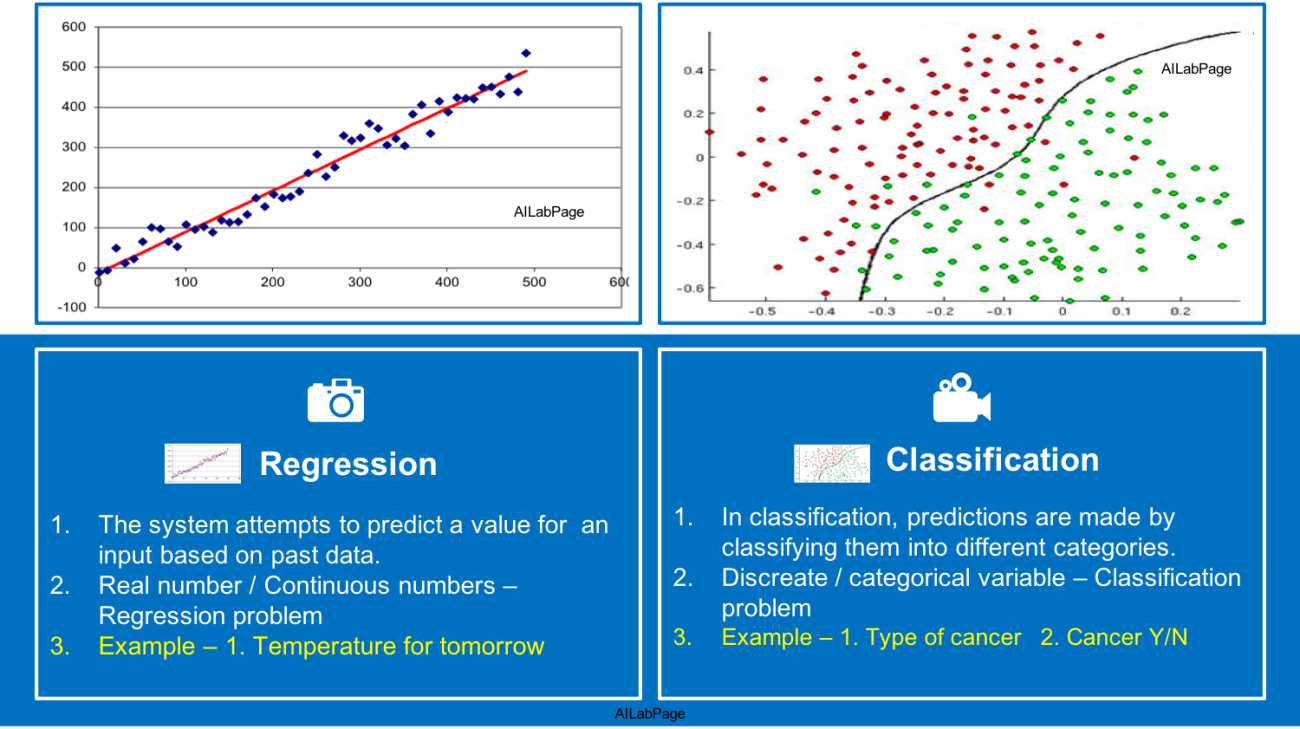

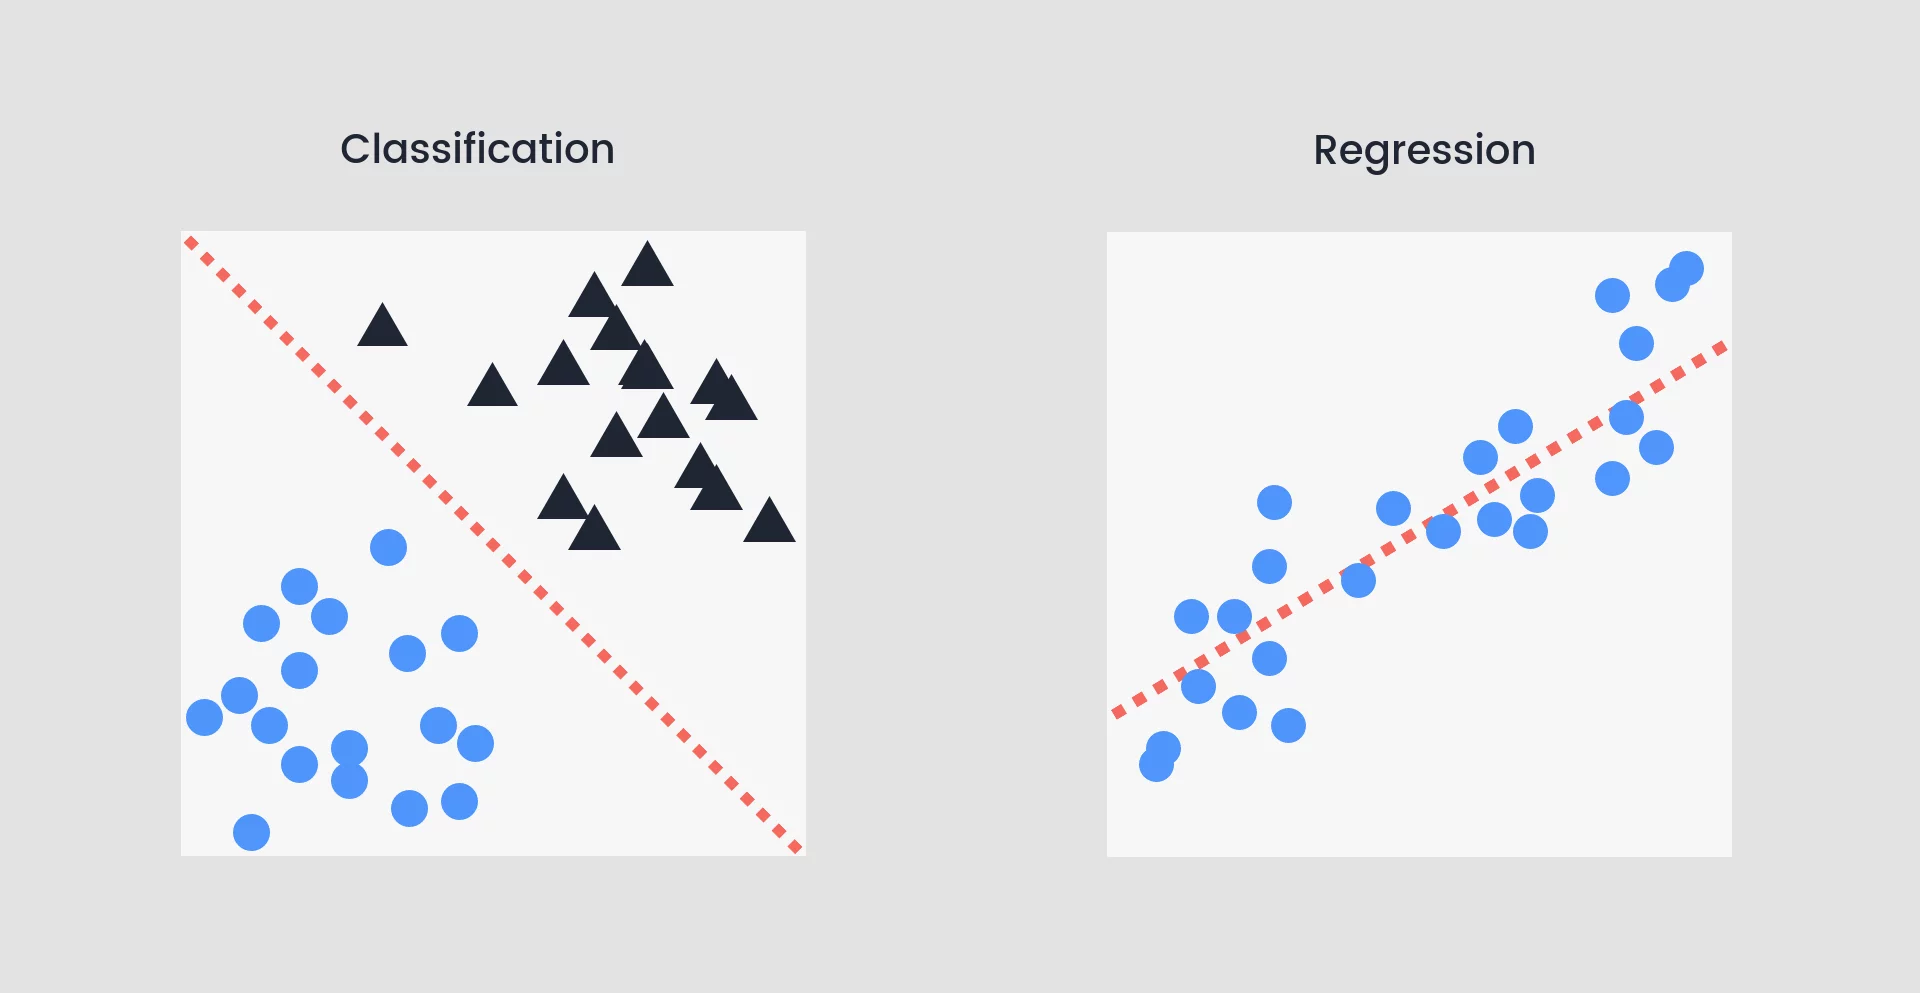

https://docs.google.com/presentation/d/1gY6kLb7YJtWzWqprVe3XfOjHALkPH6I1FvZ7MssWiTU/edit?usp=sharing

image.png

image.png

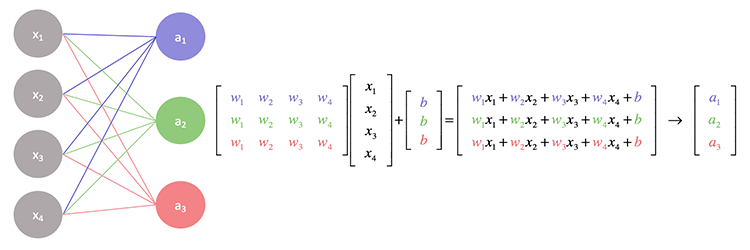

image.png

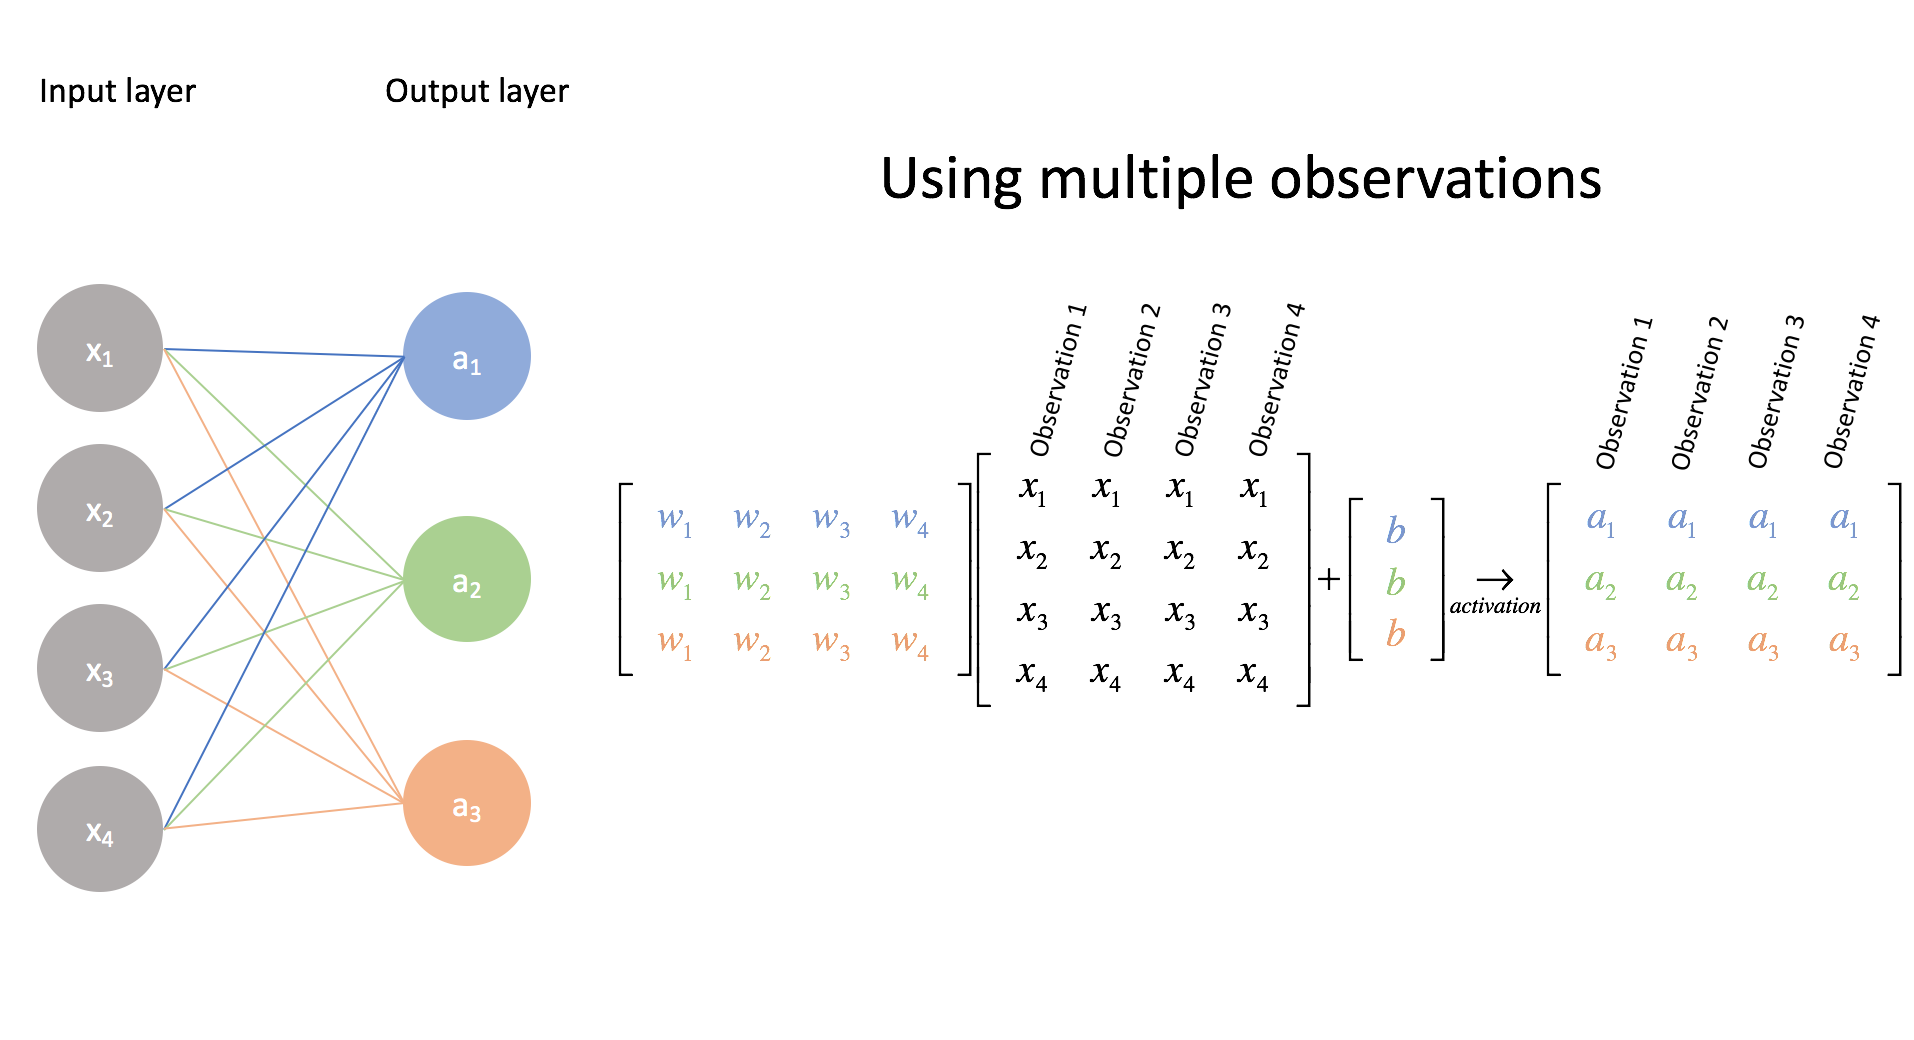

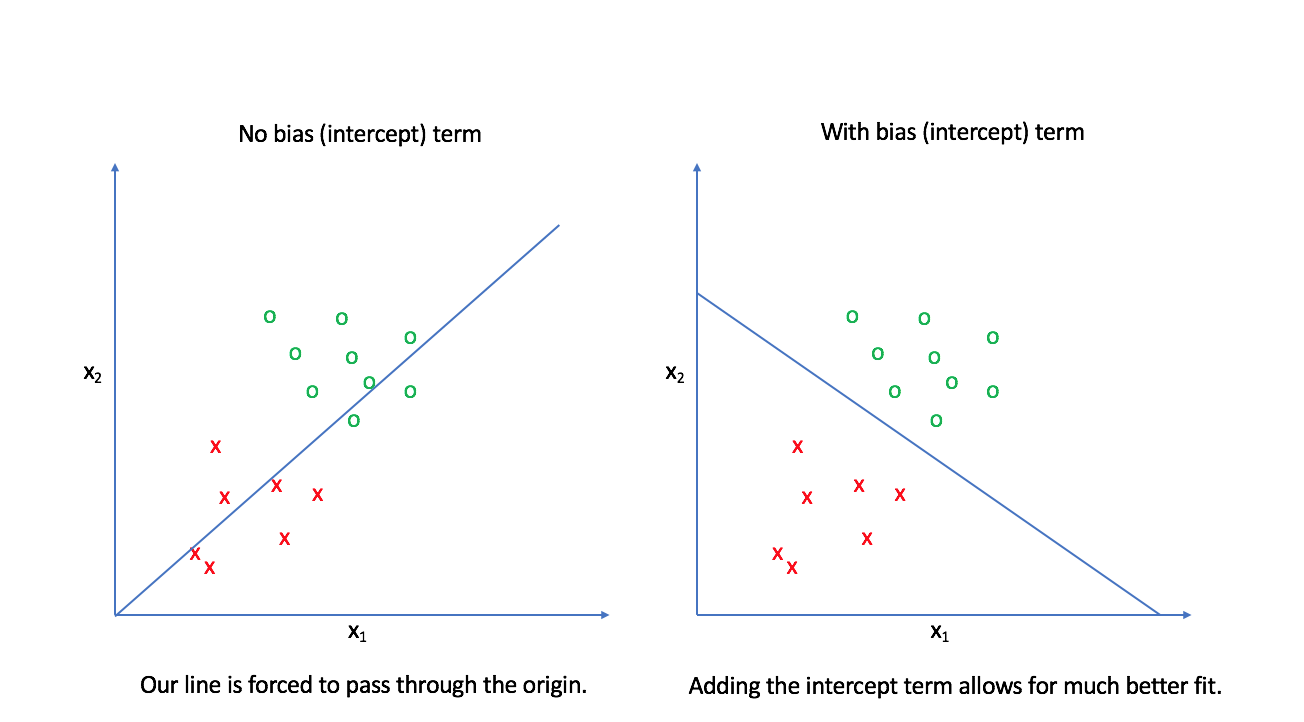

In [1]:
!pip install git+https://github.com/williamedwardhahn/mpcr     #connecting class github to colab
from mpcr import *
import numpy as np
import matplotlib.pyplot as plt
!pip install wget
import wget
import torch
import torch.nn as nn
from torch import tensor 
from torch.autograd import Variable
from torch import randn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/williamedwardhahn/mpcr to /tmp/pip-req-build-3tcwd01s
  Running command git clone -q https://github.com/williamedwardhahn/mpcr /tmp/pip-req-build-3tcwd01s
  Created wheel for ImportMPCR: filename=ImportMPCR-0.0.1-py3-none-any.whl size=7682 sha256=441a78921c8d5ad44f7c76f18e74b533dc4607536ec2647b553517bf37c205d4
  Stored in directory: /tmp/pip-ephem-wheel-cache-vnlqimxf/wheels/8e/ce/5f/35330a2ccb2f50a7b7061e8a8b87f1ebe8d617d383beddc76f
Successfully built ImportMPCR


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=b90aa8a5070337155e9909bbb4fd9c4ee34a5a7d5d3e9c1271ae4980b6f11b07
  Stored in directory: /root/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget


# $y=mx+b$

In [ ]:
x = np.arange(0,9) #defining x

In [ ]:
x.shape  #showing x.shape

(9,)

In [ ]:
x = x[:,None]

In [ ]:
x.shape

(9, 1)

In [ ]:
y = 3*x-5

In [ ]:
plt.plot(x,y,'.') #plotting x,y in a scatter plot

##Solve Linear Fit Using Pytorch Gradient Descent

In [ ]:
x = torch.Tensor(x) # Convert the numpy vectors to pytorch tensors 
y = torch.Tensor(y)

In [ ]:
m = Variable(randn(1,1), requires_grad=True) # Initialize pytorch variables, i.e. values you want to optimize. In this case with normally distributed random numbers, one for m the slope and one for b the interscept
b = Variable(randn(1,1), requires_grad=True)

In [ ]:
learning_rate = 0.001 # Descend Gradient Slowly so as to Not Overshoot Minima and Oscillate

In [ ]:
for t in range(1000):

    y_pred = m * x + b  # Define Model 
    
    loss = (y_pred - y).pow(2).sum() # Define Loss Function as Sum of the Squares of the Differences 

    loss.backward() # Calculate Gradient, dLoss/dp for Each Parameter p 
    
    m.data -= learning_rate * m.grad.data # Gradient Descent
    b.data -= learning_rate * b.grad.data

    m.grad.zero_() # Reset Gradient Value
    b.grad.zero_()

    print(t, loss.item(),m.item(),b.item())

0 135.73631286621094 1.7217997312545776 0.4918195605278015
1 99.32064819335938 1.8478944301605225 0.4849972426891327
2 86.5562973022461 1.9230337142944336 0.469218909740448
3 81.73005676269531 1.9686521291732788 0.4483145475387573
4 79.57183837890625 1.9971634149551392 0.4245019257068634
5 78.31394958496094 2.015756607055664 0.3990651071071625
6 77.36351013183594 2.028595209121704 0.3727474510669708
7 76.5215835571289 2.038090467453003 0.34597915410995483
8 75.72142791748047 2.0456390380859375 0.319009006023407
9 74.94055938720703 2.0520496368408203 0.2919808328151703
10 74.17141723632812 2.057790756225586 0.2649776041507721
11 73.41140747070312 2.063133716583252 0.23804707825183868
12 72.65962219238281 2.0682358741760254 0.21121659874916077
13 71.91563415527344 2.073188066482544 0.18450170755386353
14 71.17933654785156 2.078043222427368 0.15791113674640656
15 70.45059204101562 2.082831859588623 0.1314496248960495
16 69.72930145263672 2.0875720977783203 0.10511963069438934
17 69.015396

In [ ]:
loss.item()

0.002818737179040909

In [ ]:
m.item()

2.994199275970459

In [ ]:
b.item()

-4.967541694641113

# Pytorch Linear Model

In [ ]:
# Hyper-parameters
input_size = 1
output_size = 1
num_epochs = 1000
learning_rate = 0.01

In [ ]:
# Linear regression model
model = nn.Linear(input_size, output_size)

In [ ]:
# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

In [ ]:
# Convert numpy arrays to torch tensors
inputs = x
targets = y

In [ ]:
# Train the model
for epoch in range(num_epochs):
    
    
    # Forward pass
    outputs = model(inputs)
    
    loss = criterion(outputs, targets)
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    
    print(epoch+1, num_epochs, loss.item())


1 1000 215.2570343017578
2 1000 65.41362762451172
3 1000 22.895355224609375
4 1000 10.795419692993164
5 1000 7.317113876342773
6 1000 6.282886505126953
7 1000 5.941900253295898
8 1000 5.7979350090026855
9 1000 5.710348129272461
10 1000 5.639271259307861
11 1000 5.573400020599365
12 1000 5.509522438049316
13 1000 5.446726322174072
14 1000 5.384745121002197
15 1000 5.323494911193848
16 1000 5.262950420379639
17 1000 5.203097343444824
18 1000 5.143924713134766
19 1000 5.085426330566406
20 1000 5.027591228485107
21 1000 4.970415115356445
22 1000 4.9138898849487305
23 1000 4.858005523681641
24 1000 4.802757263183594
25 1000 4.748138904571533
26 1000 4.694140911102295
27 1000 4.640756607055664
28 1000 4.587979316711426
29 1000 4.535802841186523
30 1000 4.484220027923584
31 1000 4.433221817016602
32 1000 4.382806777954102
33 1000 4.332961559295654
34 1000 4.283685684204102
35 1000 4.234969139099121
36 1000 4.186807155609131
37 1000 4.139193534851074
38 1000 4.092120170593262
39 1000 4.0455832

In [ ]:
# Plot the graph
predicted = model(inputs).detach().numpy()


plt.plot(x, y, 'ro', label='Original data')
plt.plot(x, predicted, label='Fitted line')
plt.legend()
plt.show()

In [ ]:
model  #the model

Linear(in_features=1, out_features=1, bias=True)

In [ ]:
model.weight #the model weight

Parameter containing:
tensor([[2.9973]], requires_grad=True)

In [ ]:
model.bias  #the model bias

Parameter containing:
tensor([-4.9849], requires_grad=True)

In [ ]:
def GPU(data):  #defining GPU
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):   #defining GPU_data
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

In [ ]:
def plot(x):                               #defining plot
    if type(x) == torch.Tensor :
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(10, 10)
    plt.show()

In [ ]:
def plotfc(x):                              #defining plotfc
    if type(x) == torch.Tensor :
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'cool')
    ax.axis('off')
    fig.set_size_inches(10, 10)
    plt.colorbar(im)
    plt.show()

In [ ]:
def montage_plot(x):              #defining montage_plot
    x = np.pad(x, pad_width=((0, 0), (1, 1), (1, 1)), mode='constant', constant_values=0)
    plot(montage(x))

In [ ]:
def one_hot(y):                   #defining one_hot
    y2 = GPU_data(torch.zeros((y.shape[0],10)))
    for i in range(y.shape[0]):
        y2[i,int(y[i])] = 1
    return y2

In [ ]:
##MNIST
#train_set = datasets.MNIST('./data', train=True, download=True)
#test_set = datasets.MNIST('./data', train=False, download=True)

#KMNIST
train_set = datasets.KMNIST('./data', train=True, download=True)
test_set = datasets.KMNIST('./data', train=False, download=True)

# Fashion MNIST
#train_set = datasets.FashionMNIST('./data', train=True, download=True)
#test_set = datasets.FashionMNIST('./data', train=False, download=True)

  0%|          | 0/18165135 [00:00<?, ?it/s]

Extracting ./data/KMNIST/raw/train-images-idx3-ubyte.gz to ./data/KMNIST/raw



  0%|          | 0/29497 [00:00<?, ?it/s]

Extracting ./data/KMNIST/raw/train-labels-idx1-ubyte.gz to ./data/KMNIST/raw



  0%|          | 0/3041136 [00:00<?, ?it/s]

Extracting ./data/KMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/KMNIST/raw



  0%|          | 0/5120 [00:00<?, ?it/s]

Extracting ./data/KMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/KMNIST/raw



In [ ]:
X = train_set.data.numpy()
X_test = test_set.data.numpy()
Y = train_set.targets.numpy()
Y_test = test_set.targets.numpy()

X = X[:,None,:,:]/255
X_test = X_test[:,None,:,:]/255

In [ ]:
X.shape #the X.shape

(60000, 1, 28, 28)

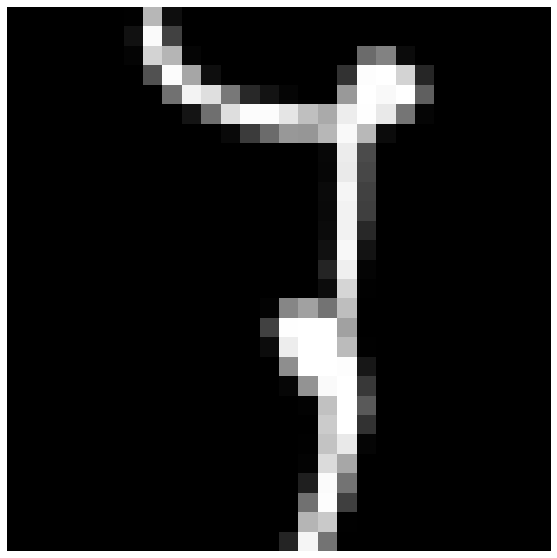

In [ ]:
plot(X[123,0,0:28,0:28])  #ploting x[123,0,0:28,0:28]

In [ ]:
Y[123] 

2

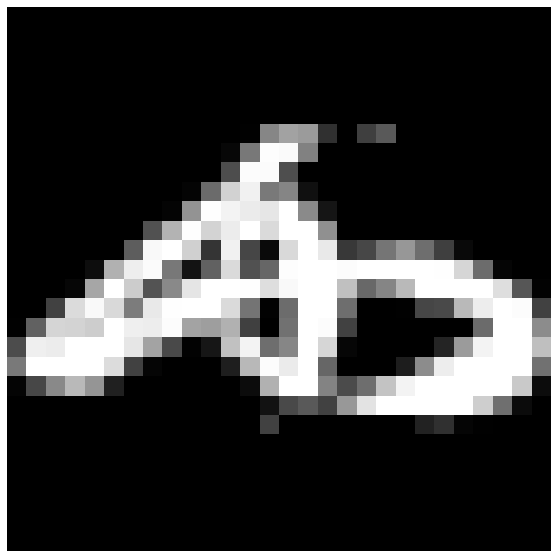

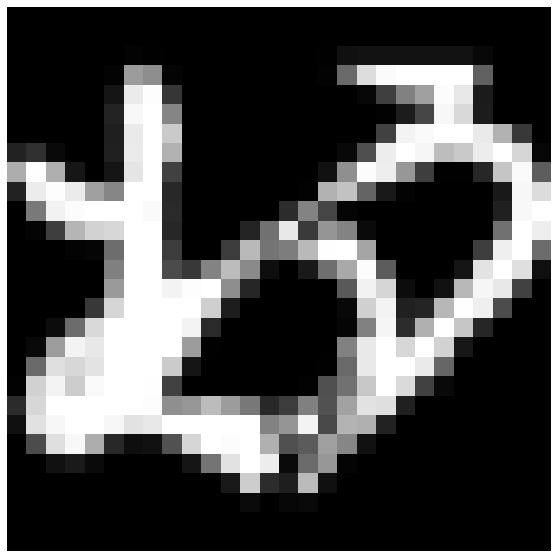

In [ ]:
for i in range(3):
    plot(X[i,0,:,:])

In [ ]:
Y    #showing the array of Y

array([8, 7, 0, ..., 0, 4, 9])

In [ ]:
X[0:25,0,:,:].shape

(25, 28, 28)

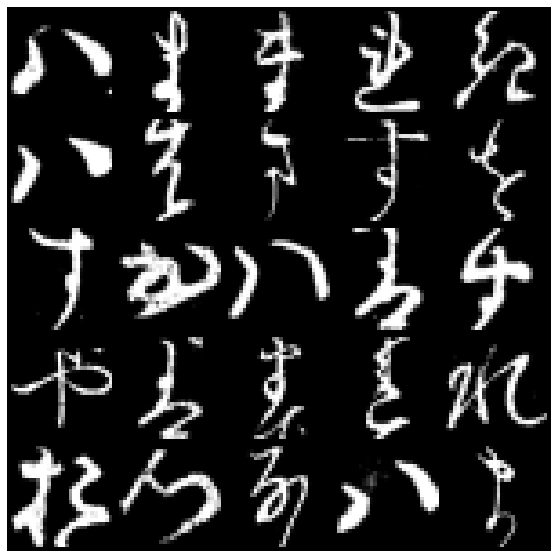

In [ ]:
montage_plot(X[125:150,0,:,:])

In [ ]:
X.shape[0]

60000

In [ ]:
X_test.shape

(10000, 1, 28, 28)

In [ ]:
X.shape[0]

60000

In [ ]:
X_test.shape[0]

10000

In [ ]:
28*28  #multipying 28 by 28

784

In [ ]:
X = X.reshape(X.shape[0],784)
X_test = X_test.reshape(X_test.shape[0],784)

In [ ]:
X.shape,X_test.shape

((60000, 784), (10000, 784))

In [ ]:
X[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.4627451 , 1.        , 1.        , 0.48627451,
       0.00392157, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.14117647, 0.93333333,
       1.        , 0.57254902, 0.00784314, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.04705882, 0.79607843, 1.        , 0.8627451 , 0.05490196,
       0.        , 0.        , 0.        , 0.04313725, 0.51764

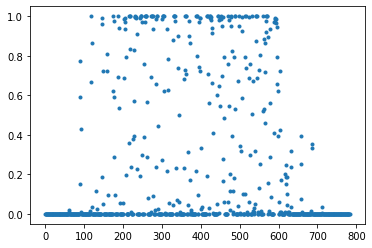

In [ ]:
plt.plot(X[100],'.')  #plotting X[100] in a scatter plot

(array([548.,  11.,  17.,  18.,  15.,  17.,  16.,  14.,  16., 112.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

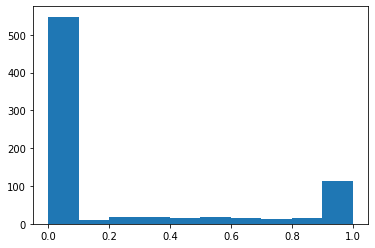

In [ ]:
plt.hist(X[0]) #ploting X[0] in a histogram

In [ ]:
X = GPU_data(X)
Y = GPU_data(Y)
X_test = GPU_data(X_test)
Y_test = GPU_data(Y_test)

In [ ]:
url = 'https://github.com/williamedwardhahn/ComplexSystems/raw/main/W.data'   #defining url
wget.download(url,"W.data")

'W.data'

In [ ]:
W = torch.load("W.data")  #defining W

In [ ]:
W.shape

torch.Size([784, 10])

In [ ]:
X.shape

torch.Size([60000, 784])

In [ ]:
def plot(x):                                           #defining plot(x)
    if type(x) == torch.Tensor :
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(10, 100)
    plt.show()

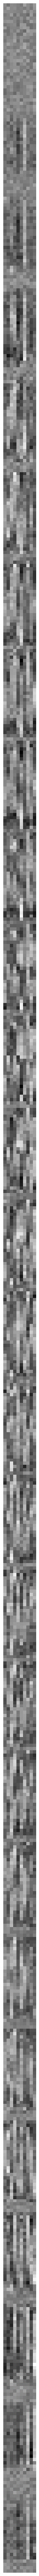

In [ ]:
plot(W[0:784,:10])

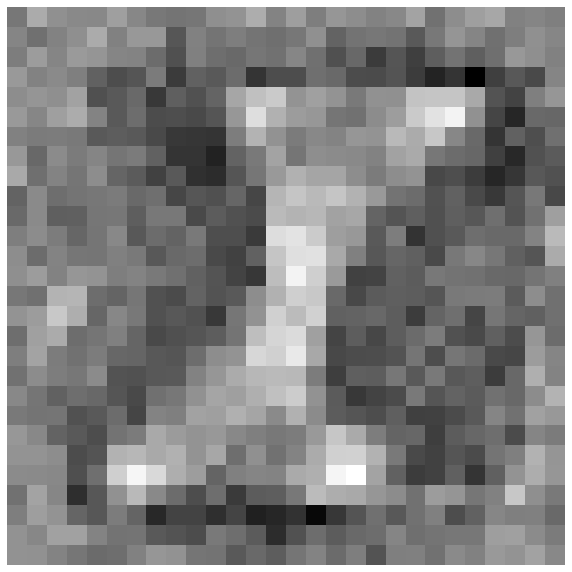

In [ ]:
plot(W[:,1].reshape(28,28))

In [ ]:
X.shape

torch.Size([60000, 784])

In [ ]:
b = 1000

def get_batch(mode):
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [ ]:
x,y = get_batch('train')

In [ ]:
x.shape

torch.Size([1000, 784])

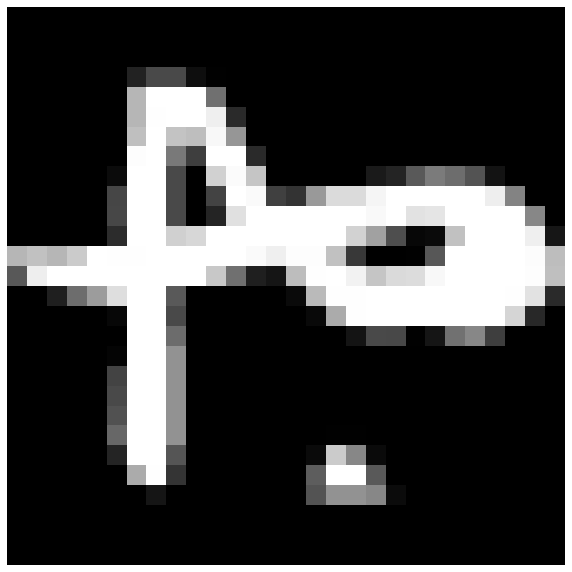

In [ ]:
plot(x[0].reshape(28,28))

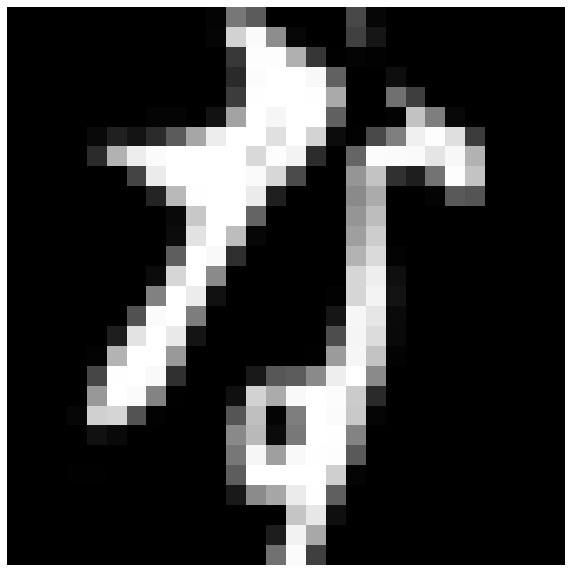

In [ ]:
plot(x[1].reshape(28,28))

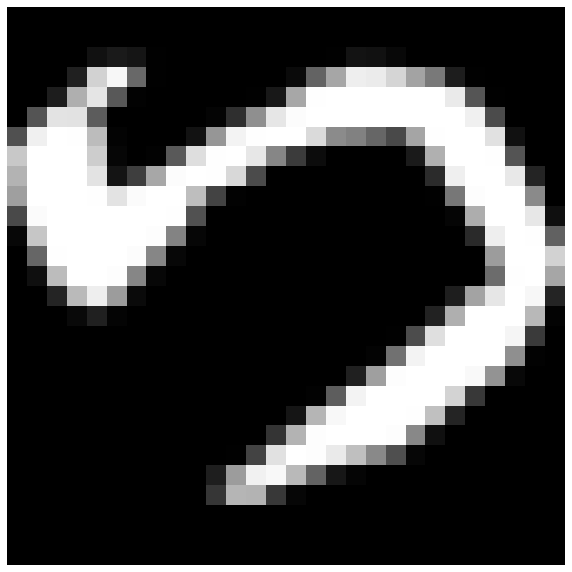

In [ ]:
plot(x[2].reshape(28,28))

In [ ]:
y   #showing y

tensor([7., 4., 3., 2., 2., 1., 9., 8., 8., 9., 8., 4., 4., 7., 6., 4., 0., 7.,
        4., 1., 2., 8., 9., 8., 2., 6., 3., 9., 3., 1., 6., 3., 4., 5., 3., 1.,
        7., 9., 6., 8., 5., 7., 2., 7., 8., 6., 4., 4., 6., 3., 3., 0., 2., 4.,
        5., 7., 7., 0., 5., 8., 1., 4., 0., 2., 1., 3., 3., 2., 0., 7., 1., 5.,
        3., 8., 5., 2., 6., 2., 1., 0., 1., 4., 0., 1., 4., 4., 0., 9., 3., 4.,
        7., 4., 1., 1., 4., 7., 8., 1., 4., 3., 1., 5., 2., 2., 9., 8., 8., 0.,
        4., 7., 1., 9., 0., 2., 5., 1., 8., 4., 1., 4., 1., 1., 0., 7., 8., 6.,
        3., 6., 9., 5., 9., 0., 2., 1., 1., 8., 1., 5., 0., 6., 6., 8., 7., 7.,
        0., 9., 0., 4., 0., 9., 9., 0., 5., 8., 6., 5., 3., 3., 4., 6., 5., 9.,
        6., 2., 6., 7., 6., 7., 7., 7., 0., 0., 0., 7., 5., 2., 3., 8., 3., 4.,
        5., 0., 7., 2., 2., 4., 0., 0., 4., 7., 5., 3., 5., 8., 3., 2., 9., 0.,
        1., 8., 2., 6., 9., 0., 3., 3., 6., 4., 8., 5., 5., 6., 6., 8., 0., 3.,
        0., 9., 7., 6., 6., 4., 2., 0., 

In [ ]:
x.shape, W.shape

(torch.Size([1000, 784]), torch.Size([784, 10]))

In [ ]:
torch.matmul(x,W).shape

torch.Size([1000, 10])

In [ ]:
(x@W).shape

torch.Size([1000, 10])

In [ ]:
%%timeit
x@W

20.3 µs ± 1.03 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [ ]:
X@W

tensor([[ -6.7411, -30.6675,  -4.6133,  ..., -18.6603, -21.3336, -11.8581],
        [ -9.2111, -17.2542,   3.0195,  ..., -13.0820, -15.9574,  -3.6528],
        [ -9.9539, -32.6373, -11.0621,  ..., -16.7772, -22.7081, -39.3788],
        ...,
        [-13.9413, -34.4255,  12.8566,  ..., -17.9977, -24.1829, -36.7925],
        [-20.0897, -28.0183,  11.9711,  ..., -14.0910,  -9.7690, -29.2732],
        [ -8.3954, -21.9395,   1.6386,  ..., -20.9600,  -7.4672,  -9.4834]],
       device='cuda:0', grad_fn=<MmBackward0>)

https://eleif.net/clicktimer.html

In [ ]:
x@W

tensor([[ -2.8586, -24.9169, -21.1748,  ...,   2.7682,  -3.1198, -15.4354],
        [ -0.7960, -21.5236,   0.6374,  ...,   0.8093,  -5.4875, -13.1169],
        [-10.9976, -26.0313,  -8.9021,  ..., -10.1783, -12.2494, -43.2362],
        ...,
        [-11.7032, -13.8707,  -3.7411,  ...,   1.4458, -10.7492,  -1.3671],
        [ -0.2264, -16.1647, -14.3459,  ..., -10.5168,  -1.8510, -19.4974],
        [-13.5924,  -9.5738,  -8.5375,  ...,  -4.1135,   1.5707,   4.7668]],
       device='cuda:0', grad_fn=<MmBackward0>)

In [ ]:
y2 = x@W 

In [ ]:
y2.shape

torch.Size([1000, 10])

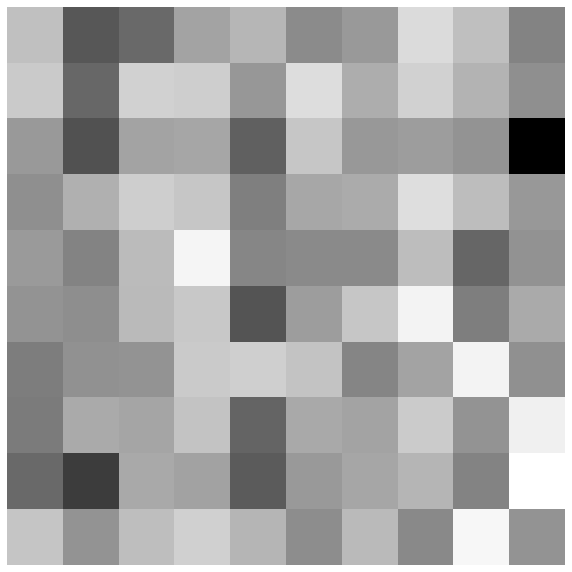

In [ ]:
plot(y2[0:10,:])

In [ ]:
y

tensor([7., 4., 3., 2., 2., 1., 9., 8., 8., 9., 8., 4., 4., 7., 6., 4., 0., 7.,
        4., 1., 2., 8., 9., 8., 2., 6., 3., 9., 3., 1., 6., 3., 4., 5., 3., 1.,
        7., 9., 6., 8., 5., 7., 2., 7., 8., 6., 4., 4., 6., 3., 3., 0., 2., 4.,
        5., 7., 7., 0., 5., 8., 1., 4., 0., 2., 1., 3., 3., 2., 0., 7., 1., 5.,
        3., 8., 5., 2., 6., 2., 1., 0., 1., 4., 0., 1., 4., 4., 0., 9., 3., 4.,
        7., 4., 1., 1., 4., 7., 8., 1., 4., 3., 1., 5., 2., 2., 9., 8., 8., 0.,
        4., 7., 1., 9., 0., 2., 5., 1., 8., 4., 1., 4., 1., 1., 0., 7., 8., 6.,
        3., 6., 9., 5., 9., 0., 2., 1., 1., 8., 1., 5., 0., 6., 6., 8., 7., 7.,
        0., 9., 0., 4., 0., 9., 9., 0., 5., 8., 6., 5., 3., 3., 4., 6., 5., 9.,
        6., 2., 6., 7., 6., 7., 7., 7., 0., 0., 0., 7., 5., 2., 3., 8., 3., 4.,
        5., 0., 7., 2., 2., 4., 0., 0., 4., 7., 5., 3., 5., 8., 3., 2., 9., 0.,
        1., 8., 2., 6., 9., 0., 3., 3., 6., 4., 8., 5., 5., 6., 6., 8., 0., 3.,
        0., 9., 7., 6., 6., 4., 2., 0., 

In [ ]:
one_hot(y)

<ipython-input-24-c3d856de2607>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))


tensor([[0., 0., 0.,  ..., 1., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 1.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.]], device='cuda:0')

<ipython-input-24-c3d856de2607>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))


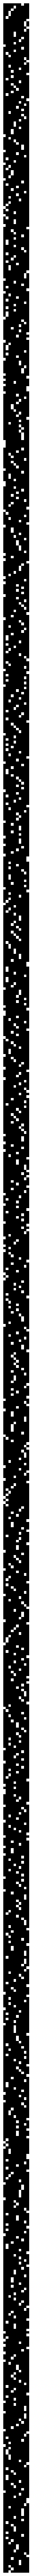

In [ ]:
plot(one_hot(y))

<ipython-input-24-c3d856de2607>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))


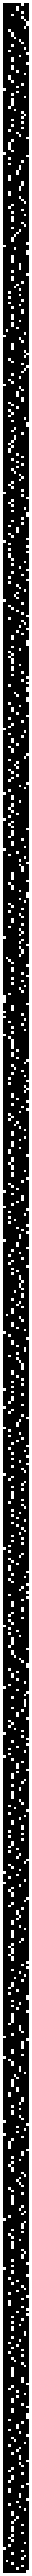

In [ ]:
plot(one_hot(torch.argmax(y2,1)))

In [ ]:
y

tensor([7., 4., 3., 2., 2., 1., 9., 8., 8., 9., 8., 4., 4., 7., 6., 4., 0., 7.,
        4., 1., 2., 8., 9., 8., 2., 6., 3., 9., 3., 1., 6., 3., 4., 5., 3., 1.,
        7., 9., 6., 8., 5., 7., 2., 7., 8., 6., 4., 4., 6., 3., 3., 0., 2., 4.,
        5., 7., 7., 0., 5., 8., 1., 4., 0., 2., 1., 3., 3., 2., 0., 7., 1., 5.,
        3., 8., 5., 2., 6., 2., 1., 0., 1., 4., 0., 1., 4., 4., 0., 9., 3., 4.,
        7., 4., 1., 1., 4., 7., 8., 1., 4., 3., 1., 5., 2., 2., 9., 8., 8., 0.,
        4., 7., 1., 9., 0., 2., 5., 1., 8., 4., 1., 4., 1., 1., 0., 7., 8., 6.,
        3., 6., 9., 5., 9., 0., 2., 1., 1., 8., 1., 5., 0., 6., 6., 8., 7., 7.,
        0., 9., 0., 4., 0., 9., 9., 0., 5., 8., 6., 5., 3., 3., 4., 6., 5., 9.,
        6., 2., 6., 7., 6., 7., 7., 7., 0., 0., 0., 7., 5., 2., 3., 8., 3., 4.,
        5., 0., 7., 2., 2., 4., 0., 0., 4., 7., 5., 3., 5., 8., 3., 2., 9., 0.,
        1., 8., 2., 6., 9., 0., 3., 3., 6., 4., 8., 5., 5., 6., 6., 8., 0., 3.,
        0., 9., 7., 6., 6., 4., 2., 0., 

In [ ]:
torch.argmax(y2,1)

tensor([7, 5, 5, 7, 3, 7, 8, 9, 9, 8, 2, 3, 3, 4, 6, 7, 3, 8, 2, 9, 6, 3, 3, 9,
        3, 3, 5, 8, 2, 2, 3, 7, 5, 0, 5, 3, 8, 3, 3, 3, 2, 4, 7, 8, 7, 3, 7, 3,
        7, 2, 5, 6, 9, 3, 2, 2, 2, 3, 0, 9, 2, 7, 2, 6, 6, 5, 5, 2, 2, 7, 7, 6,
        6, 2, 2, 6, 7, 8, 3, 2, 7, 3, 8, 3, 3, 7, 8, 3, 6, 5, 4, 3, 3, 9, 0, 4,
        9, 9, 3, 3, 3, 6, 6, 6, 3, 9, 3, 3, 7, 5, 4, 6, 2, 6, 2, 7, 2, 6, 3, 7,
        7, 3, 3, 6, 3, 3, 5, 1, 8, 0, 6, 7, 3, 3, 3, 8, 9, 8, 2, 3, 7, 9, 8, 7,
        3, 6, 2, 3, 0, 6, 7, 5, 5, 7, 7, 2, 3, 5, 2, 3, 2, 8, 3, 9, 9, 4, 3, 7,
        4, 4, 3, 2, 3, 2, 2, 5, 7, 3, 5, 7, 5, 3, 4, 6, 7, 6, 3, 2, 3, 7, 0, 7,
        9, 3, 2, 3, 8, 3, 9, 9, 7, 3, 7, 2, 5, 5, 2, 3, 9, 0, 2, 9, 2, 9, 2, 2,
        3, 8, 3, 6, 9, 3, 7, 2, 9, 2, 5, 6, 8, 5, 4, 5, 0, 7, 2, 3, 5, 7, 9, 2,
        7, 8, 6, 9, 5, 7, 3, 3, 9, 9, 3, 6, 2, 3, 2, 3, 3, 6, 3, 3, 7, 3, 9, 7,
        9, 2, 9, 9, 4, 5, 9, 9, 2, 6, 3, 3, 5, 9, 2, 7, 3, 2, 0, 8, 2, 7, 3, 3,
        5, 2, 3, 3, 9, 8, 2, 5, 4, 5, 2,

In [ ]:
b

1000

In [ ]:
torch.sum(y == torch.argmax(y2,1))/b

tensor(0.0770, device='cuda:0')

In [ ]:
X.shape

torch.Size([60000, 784])

In [ ]:
%%timeit
X[20000]@W

25.6 µs ± 824 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [ ]:
torch.argmax(X@W,1)

tensor([5, 2, 3,  ..., 2, 2, 5], device='cuda:0')

In [ ]:
Y

tensor([8., 7., 0.,  ..., 0., 4., 9.], device='cuda:0')

In [ ]:
torch.sum(torch.argmax(X@W,1) == Y)/60000

tensor(0.0789, device='cuda:0')

In [ ]:
X@W

tensor([[ -6.7411, -30.6675,  -4.6133,  ..., -18.6603, -21.3336, -11.8581],
        [ -9.2111, -17.2542,   3.0195,  ..., -13.0820, -15.9574,  -3.6528],
        [ -9.9539, -32.6373, -11.0621,  ..., -16.7772, -22.7081, -39.3788],
        ...,
        [-13.9413, -34.4255,  12.8566,  ..., -17.9977, -24.1829, -36.7925],
        [-20.0897, -28.0183,  11.9711,  ..., -14.0910,  -9.7690, -29.2732],
        [ -8.3954, -21.9395,   1.6386,  ..., -20.9600,  -7.4672,  -9.4834]],
       device='cuda:0', grad_fn=<MmBackward0>)

In [ ]:
W.shape

torch.Size([784, 10])

In [ ]:
W[:,0].shape

torch.Size([784])

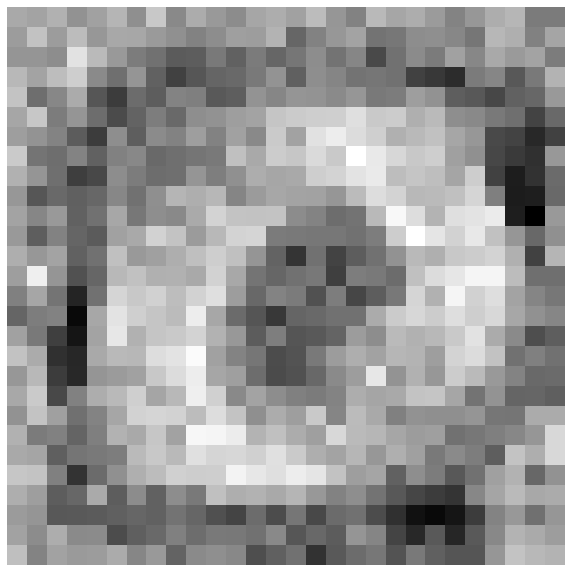

In [ ]:
plot(W[:,0].reshape(28,28))  #plotting W[:,0].reshape(28,28)

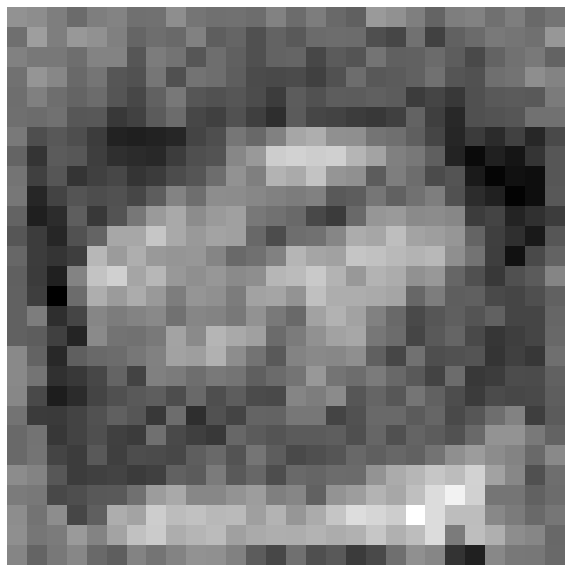

In [ ]:
plot(W[:,9].reshape(28,28))

In [ ]:
W.shape

torch.Size([784, 10])

In [ ]:
(W.T).shape

torch.Size([10, 784])

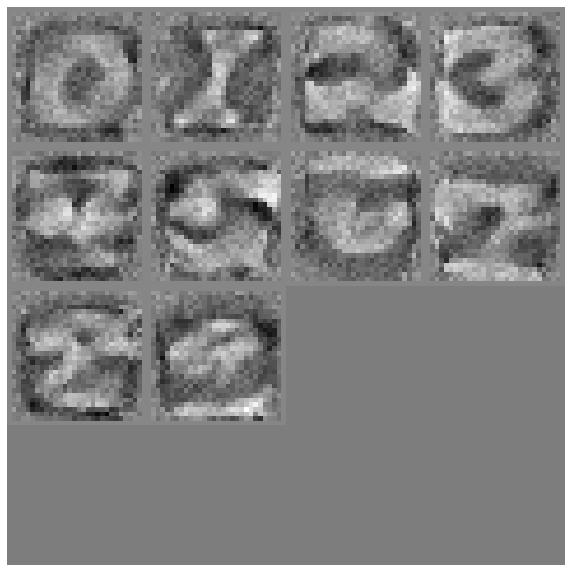

In [ ]:
montage_plot((W.T).reshape(10,28,28).cpu().detach().numpy())

In [ ]:
###################################################

In [ ]:
%%html
<img src ='https://miro.medium.com/max/1906/1*ReYpdIZ3ZSAPb2W8cJpkBg.jpeg'>

In [ ]:
%%html
<img src = 'https://miro.medium.com/max/3648/1*wz59MnXkXdWxrq_fkA2wew.png'>

In [ ]:
def softmax(x):                                       #defining softmax
    s1 = torch.exp(x - torch.max(x,1)[0][:,None])
    s = s1 / s1.sum(1)[:,None]
    return s

In [ ]:
def cross_entropy(outputs, labels):                  #defining cross_entropy
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]  

In [ ]:
%%html
<img src ='https://i.stack.imgur.com/fXqXs.png'>

In [ ]:
def randn_trunc(s): #Truncated Normal Random Numbers
    mu = 0 
    sigma = 0.1
    R = stats.truncnorm((-2*sigma - mu) / sigma, (2*sigma - mu) / sigma, loc=mu, scale=sigma)
    return R.rvs(s)

In [ ]:
def Truncated_Normal(size):

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2)
    u2 = torch.rand(size)
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2)

    return z

In [ ]:
def acc(out,y):
    with torch.no_grad():
        return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0]

In [ ]:
X.shape

torch.Size([60000, 784])

In [ ]:
def get_batch(mode):
    b = c.b
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [ ]:
def model(x,w):

    return x@w[0]

In [ ]:
def make_plots():
    
    acc_train = acc(model(x,w),y)
    
    xt,yt = get_batch('test')

    acc_test = acc(model(xt,w),yt)

    wb.log({"acc_train": acc_train, "acc_test": acc_test})

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


<ipython-input-24-c3d856de2607>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))


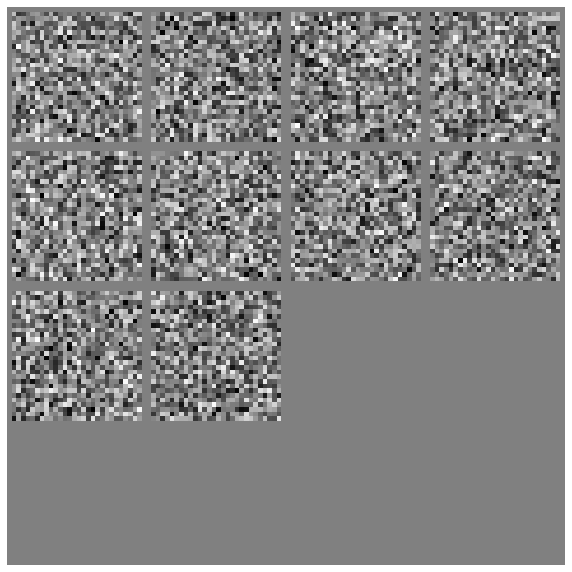

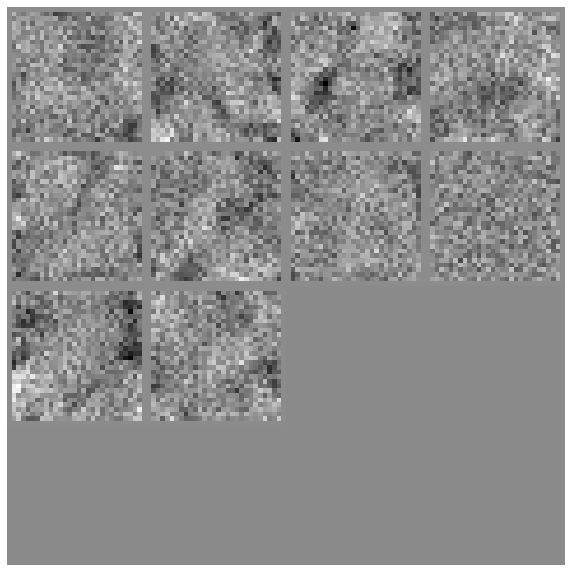

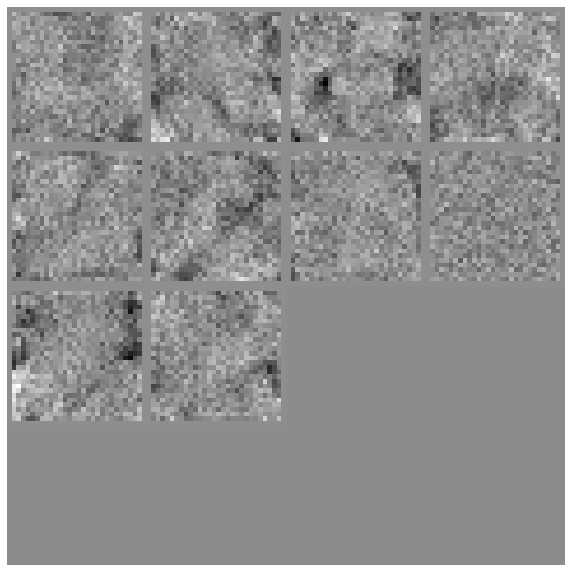

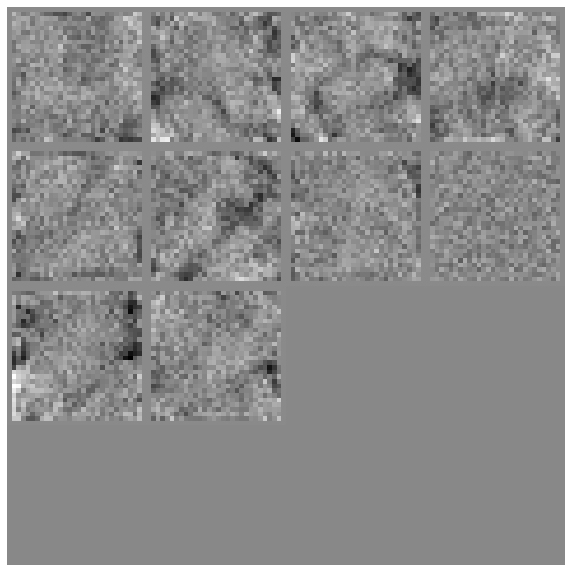

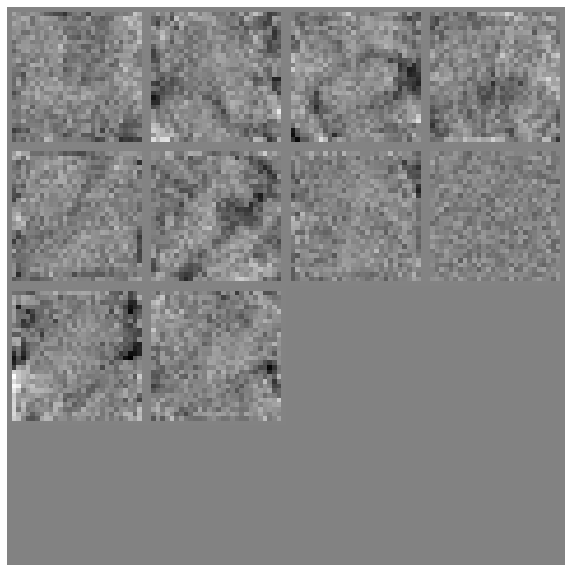

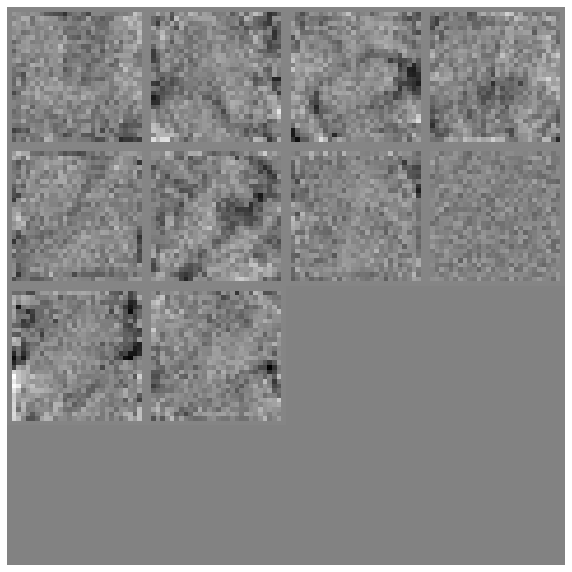

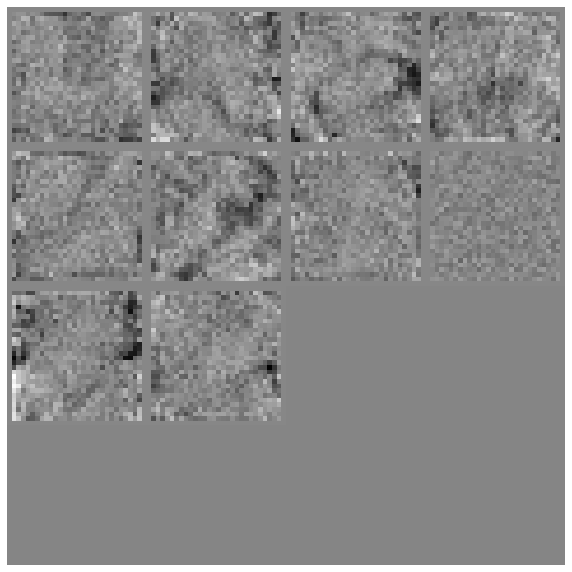

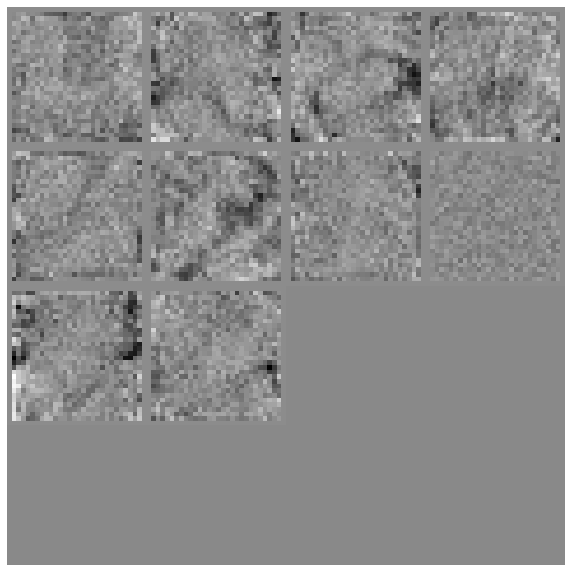

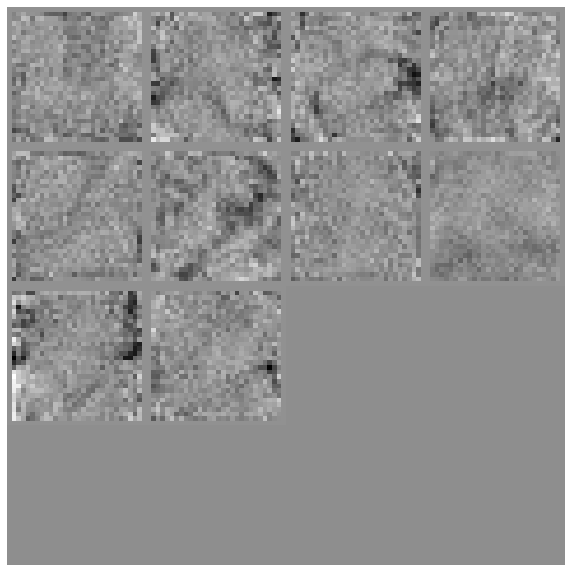

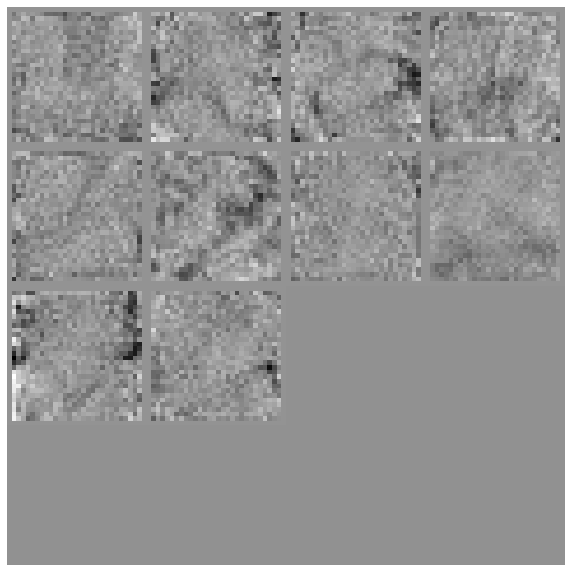

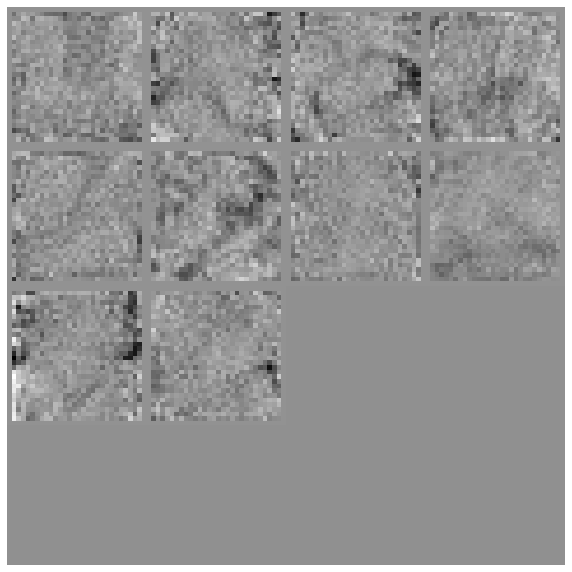

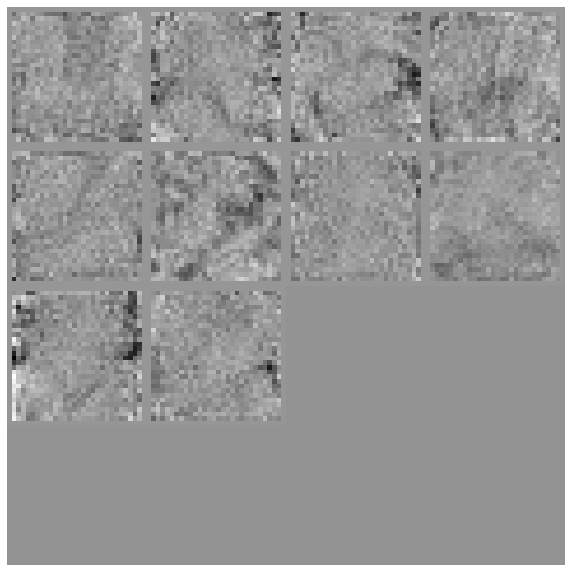

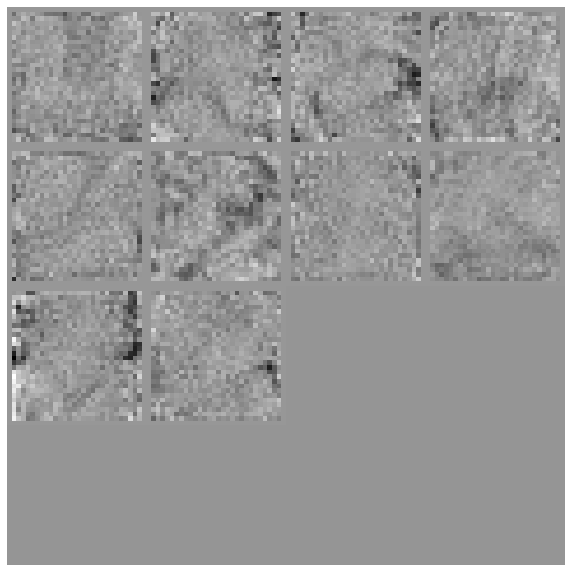

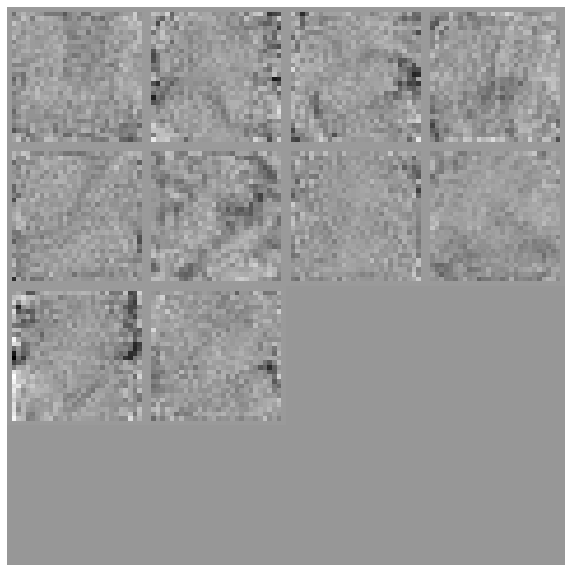

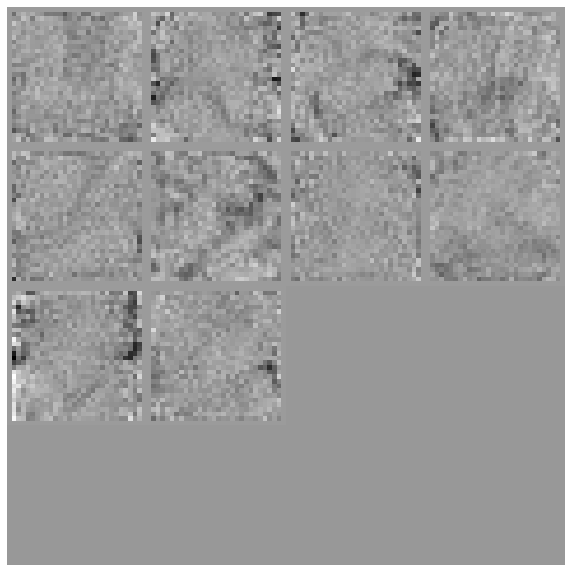

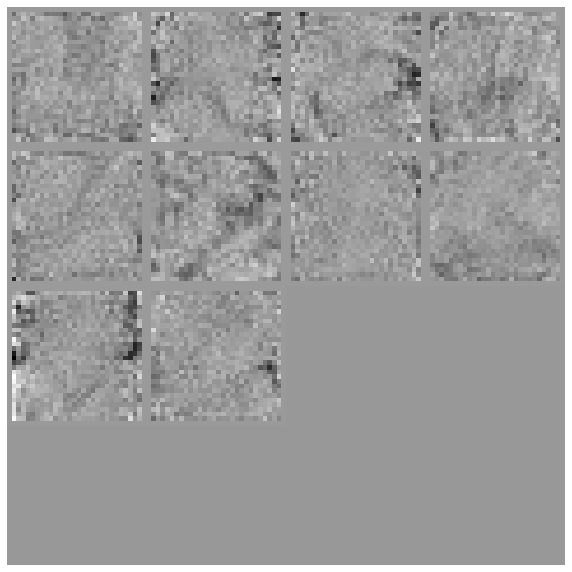

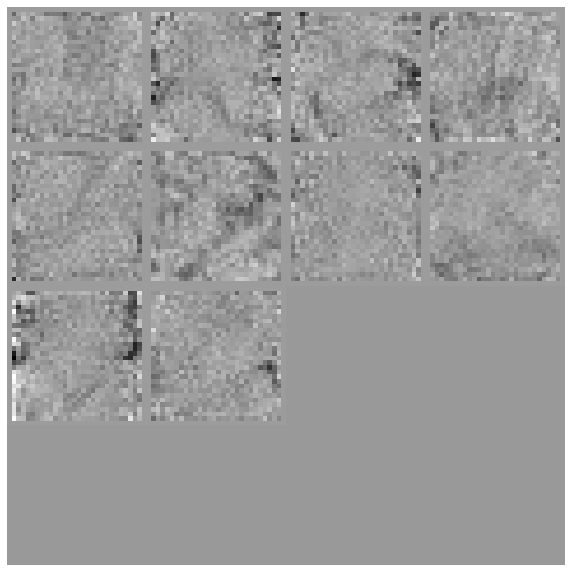

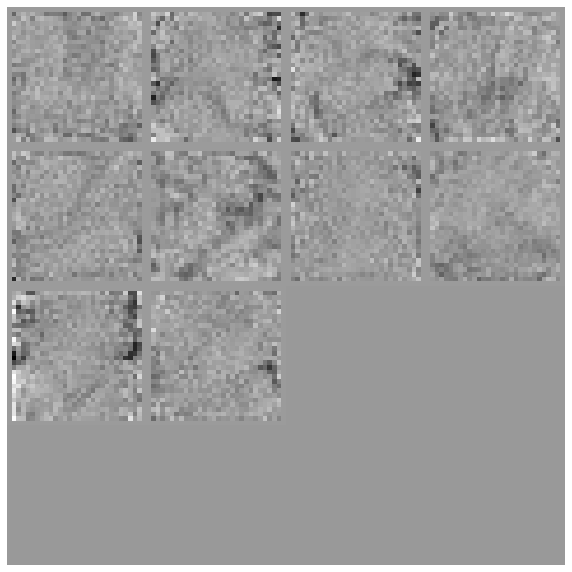

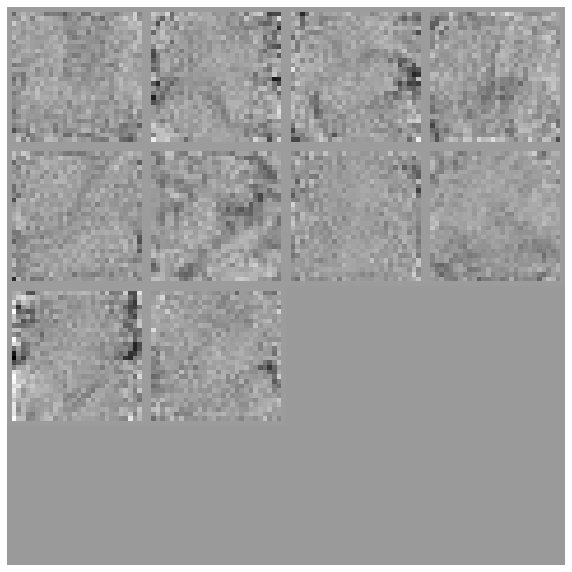

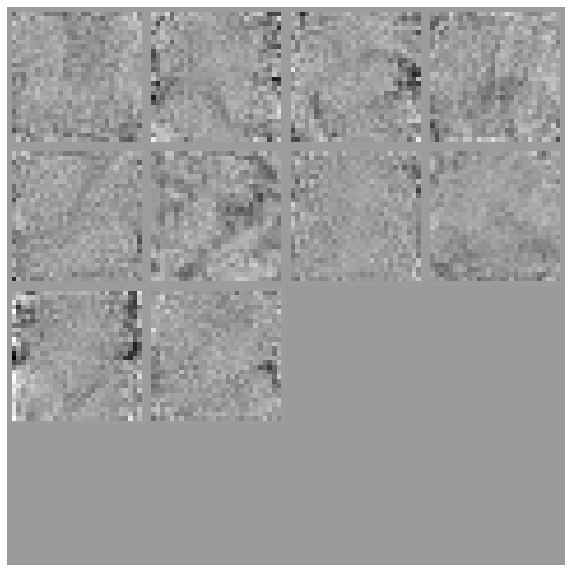

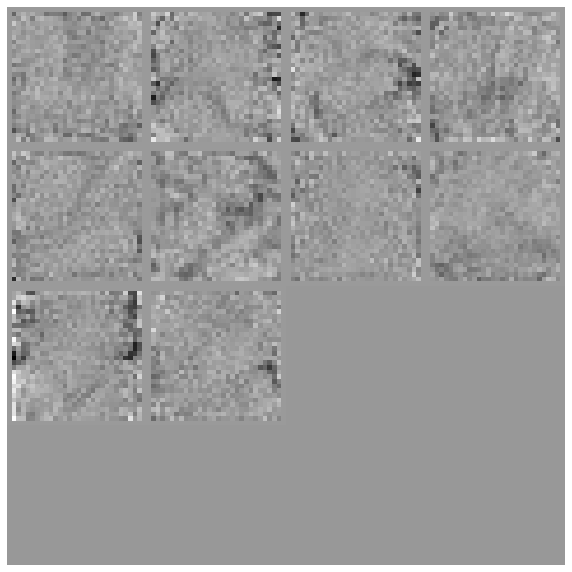

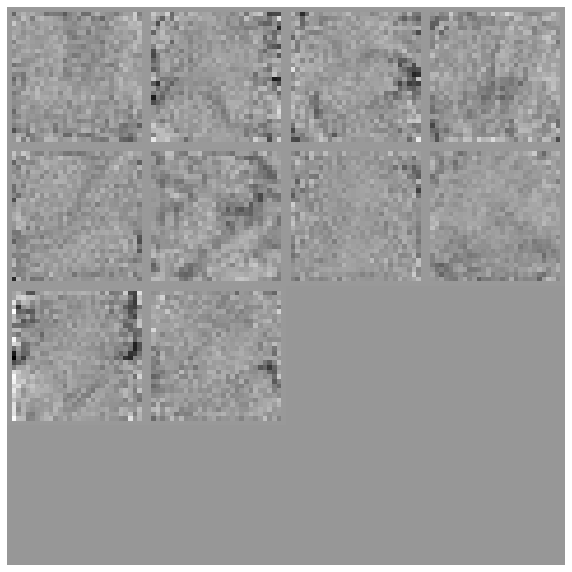

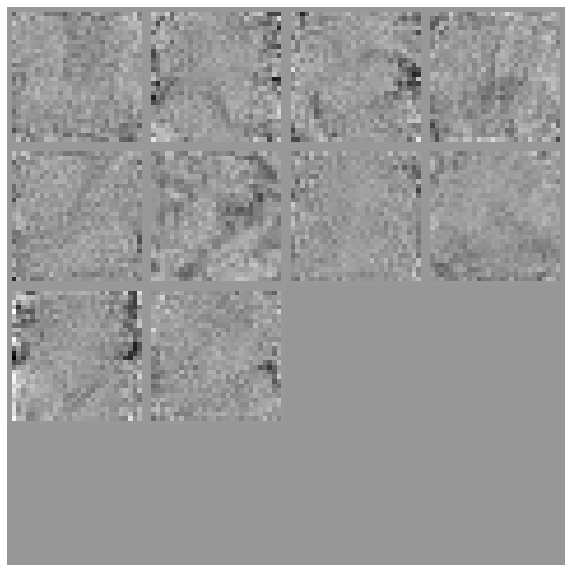

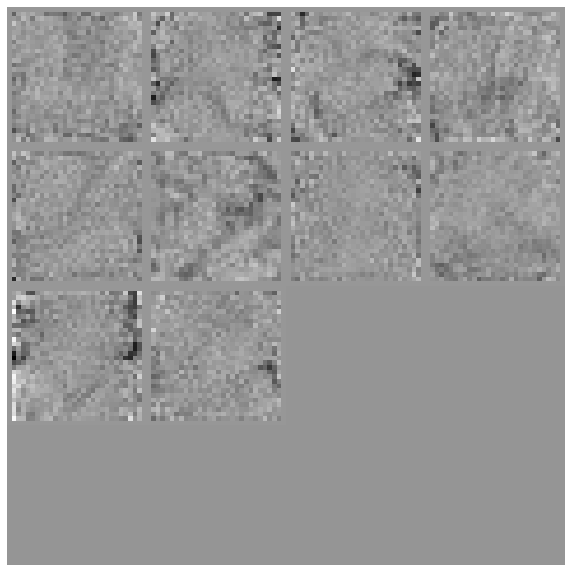

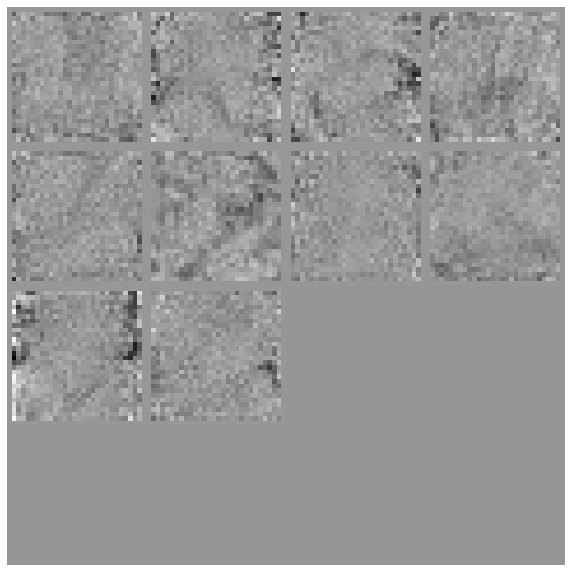

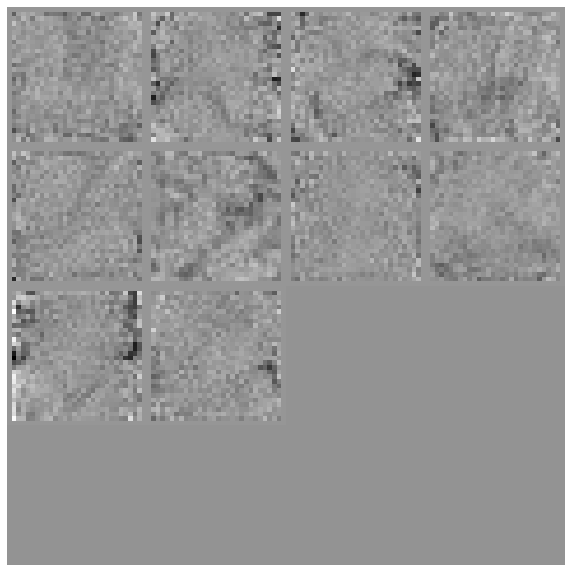

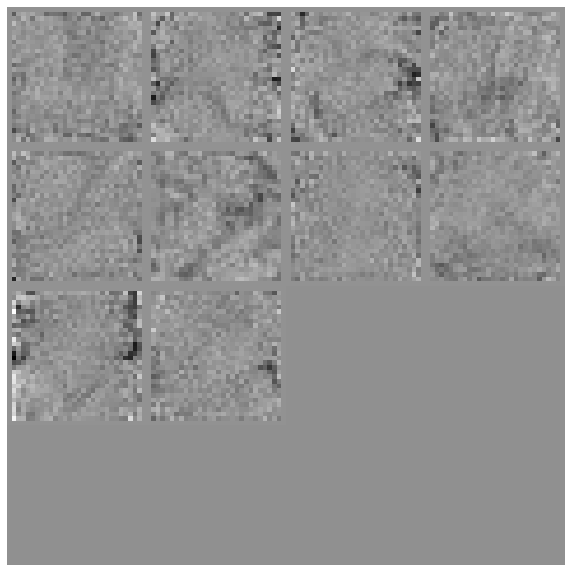

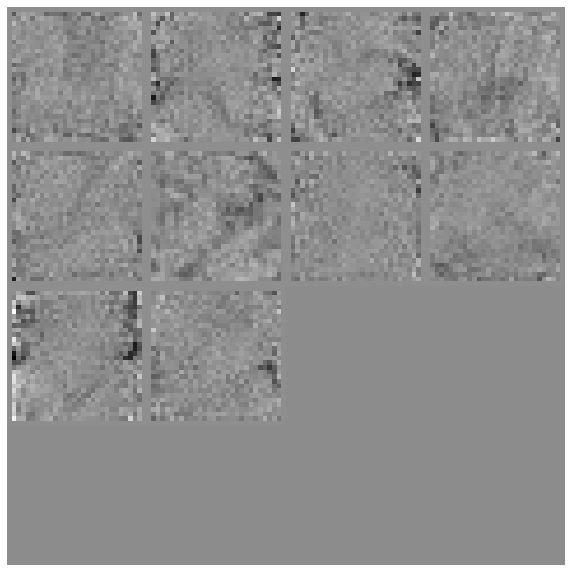

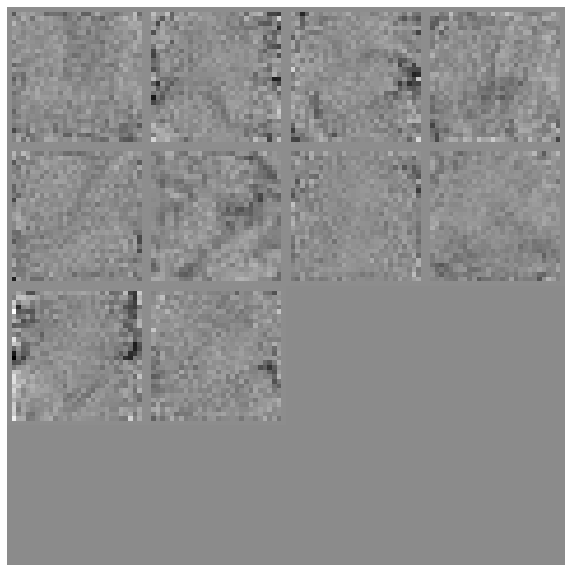

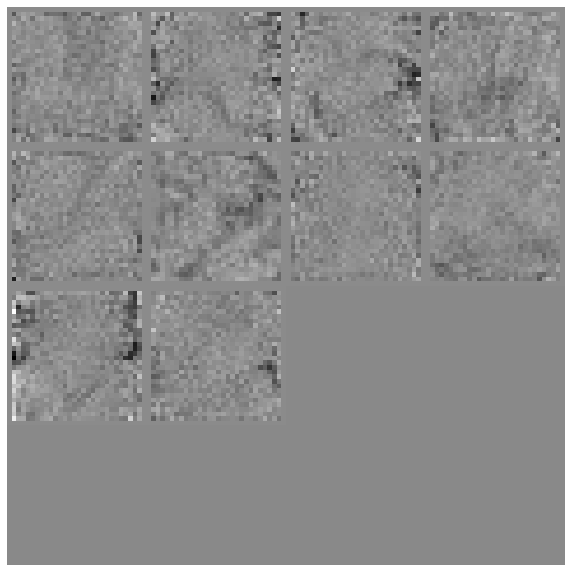

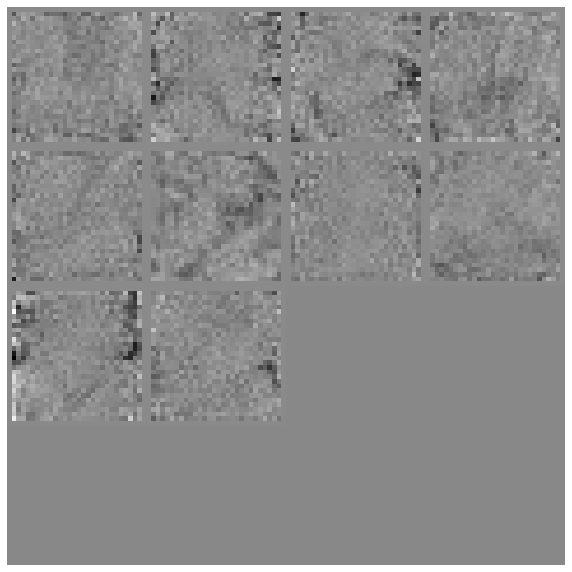

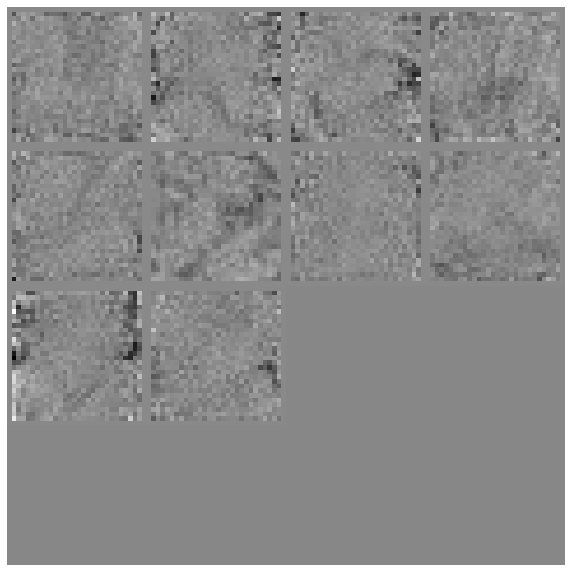

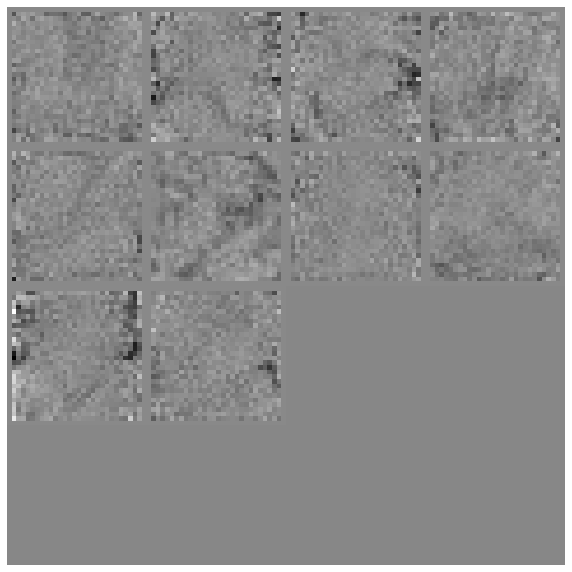

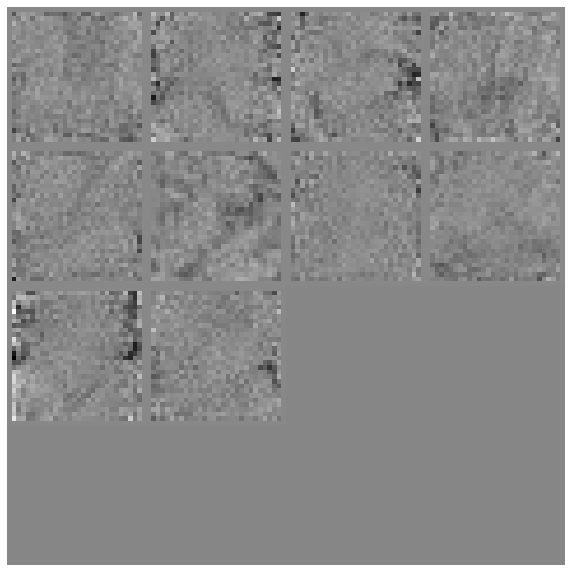

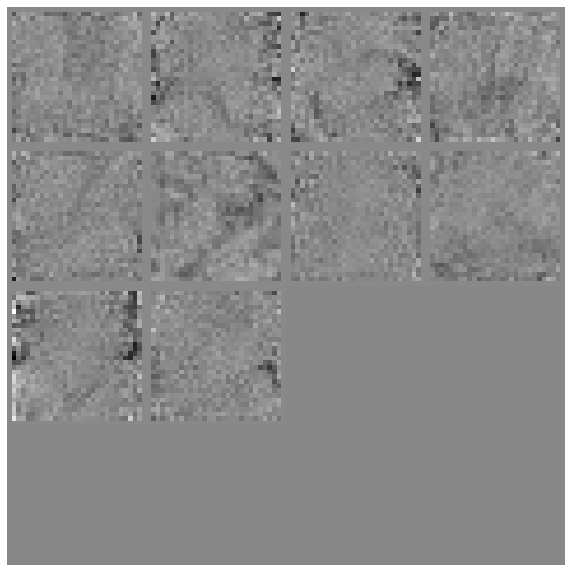

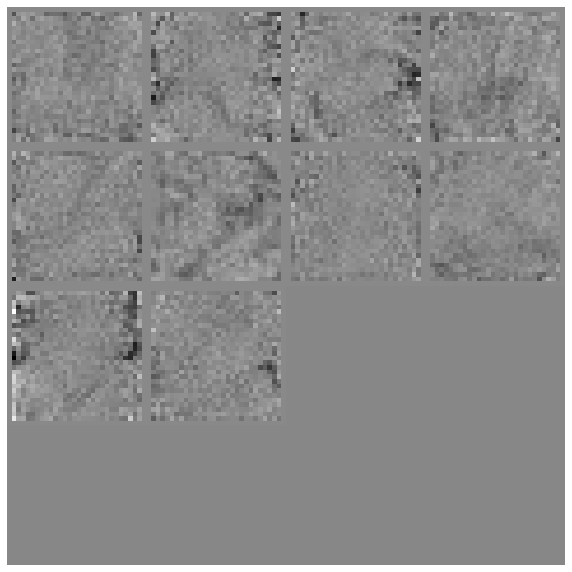

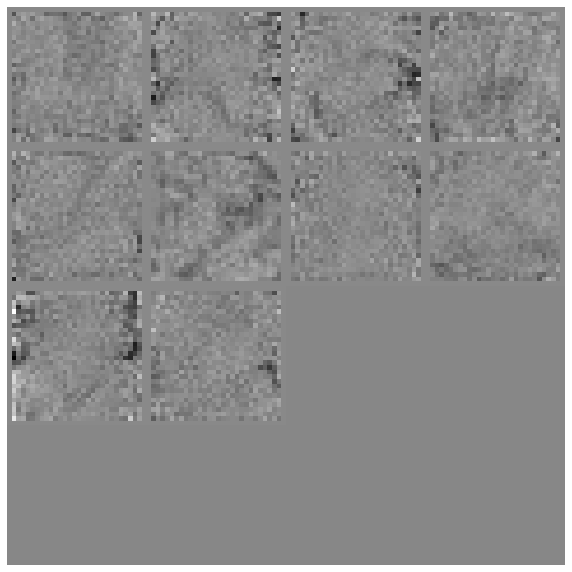

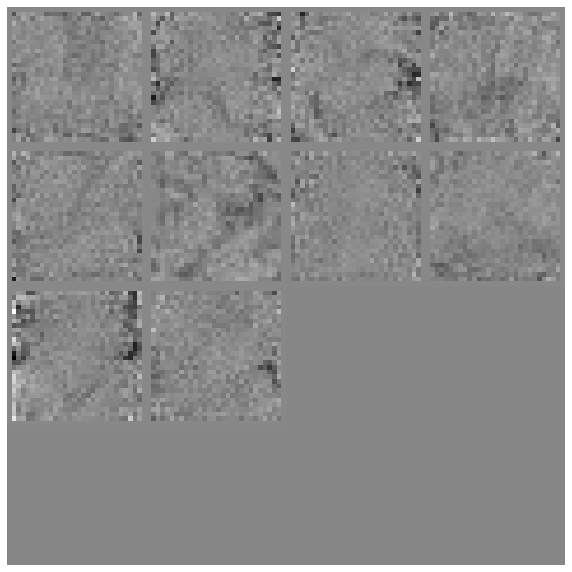

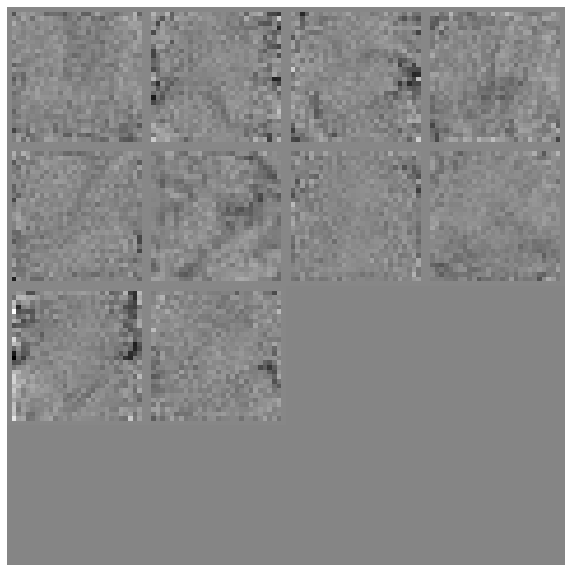

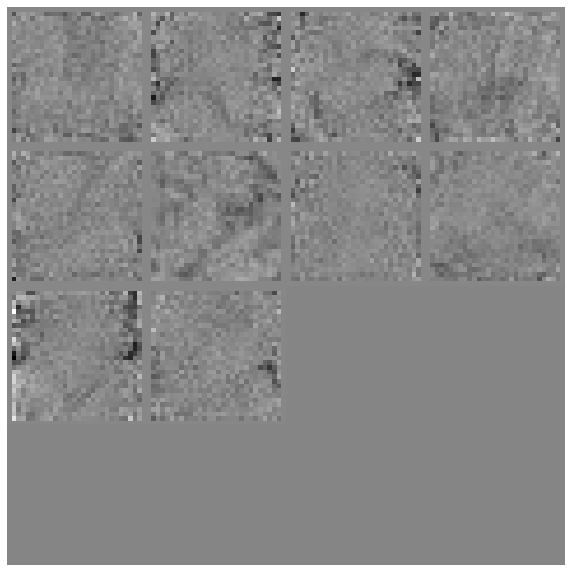

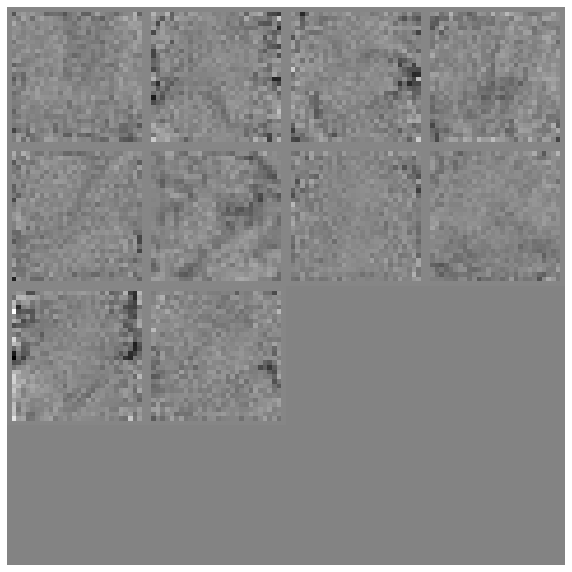

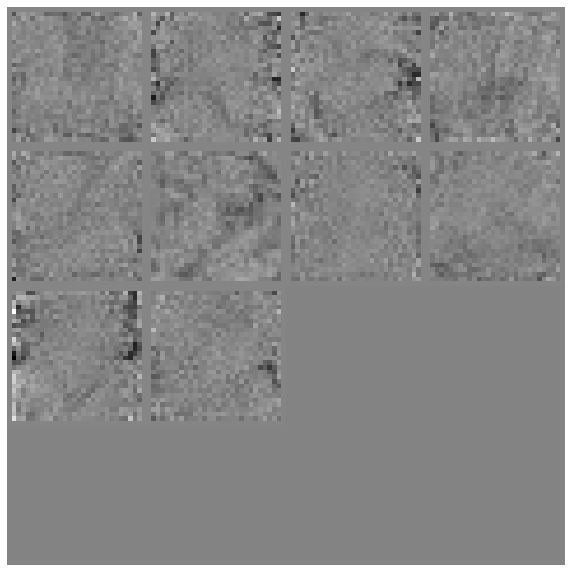

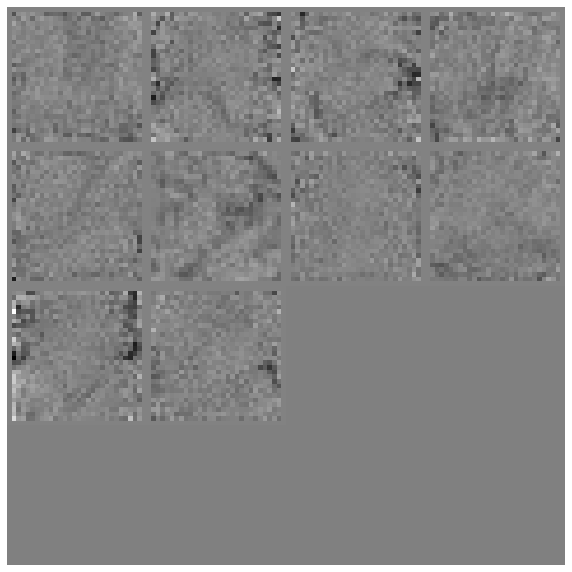

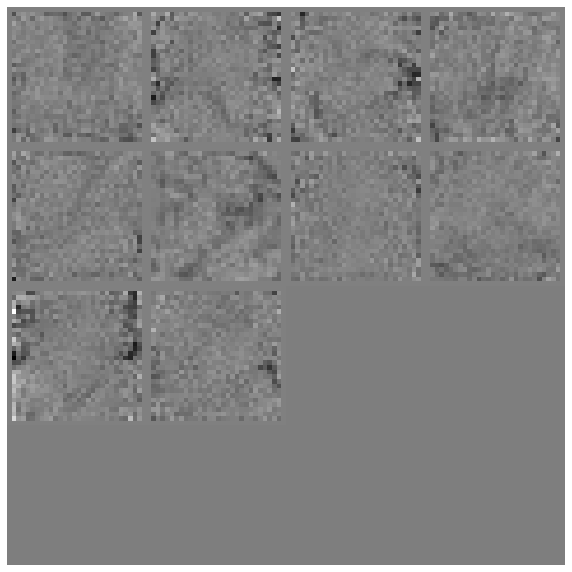

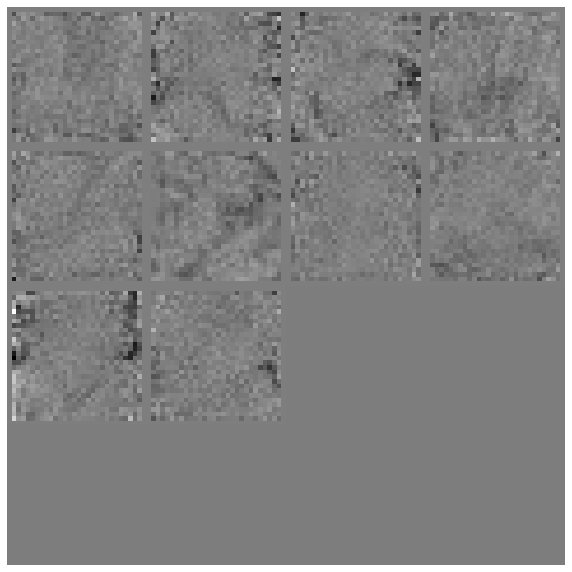

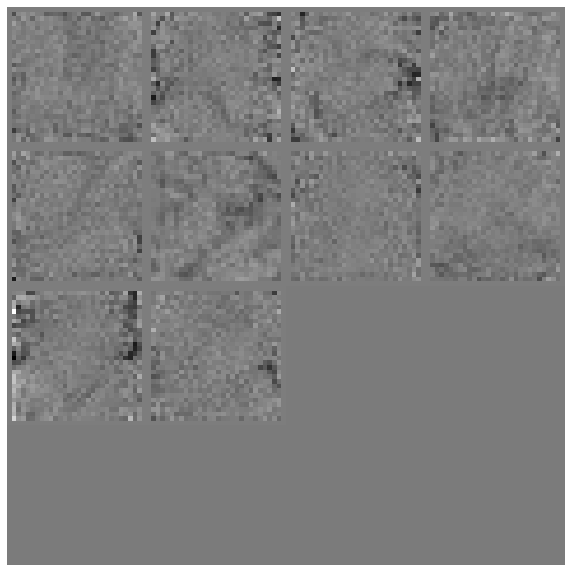

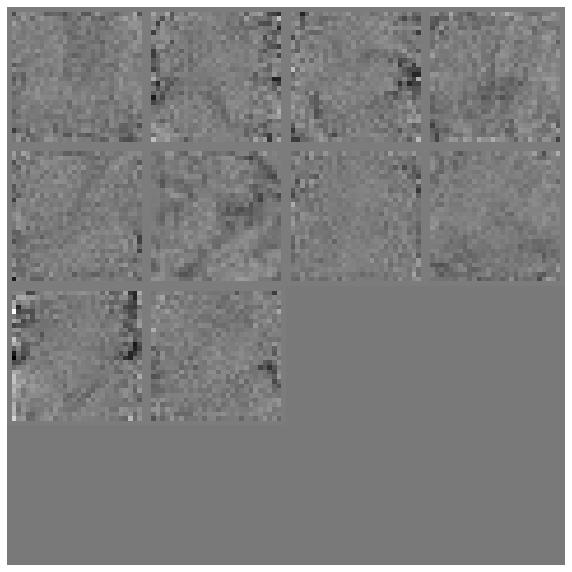

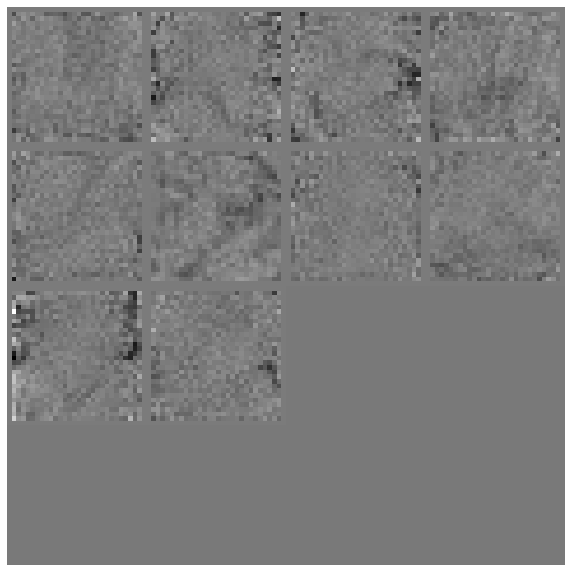

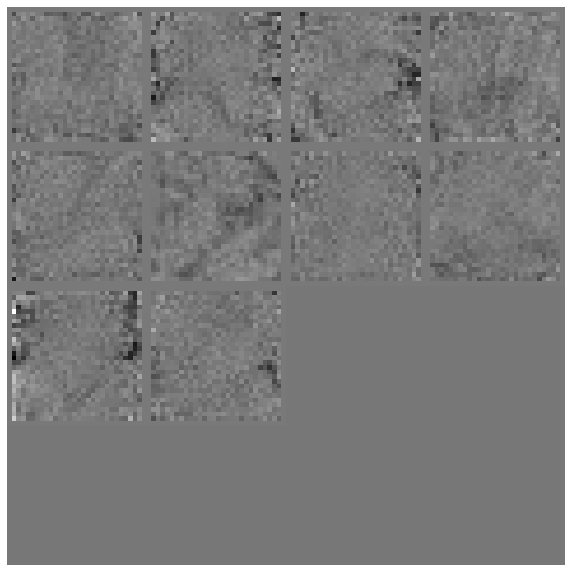

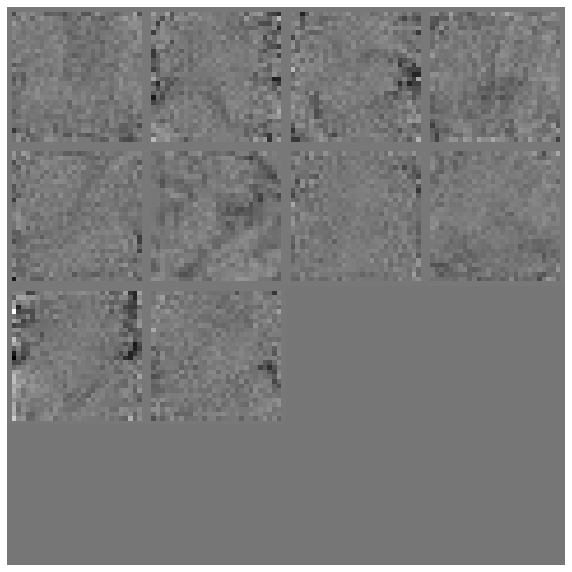

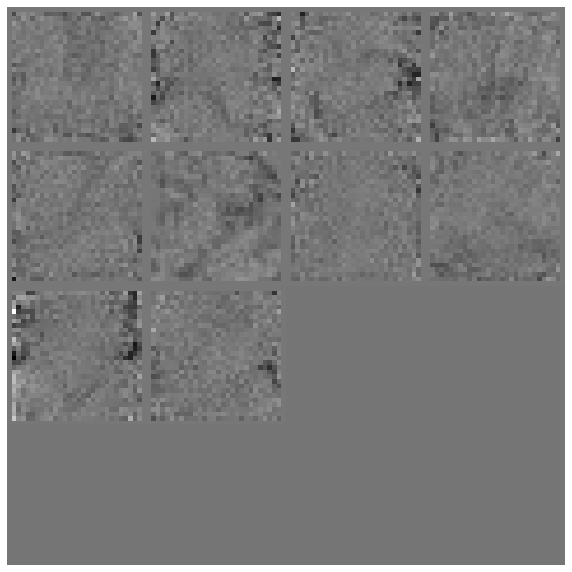

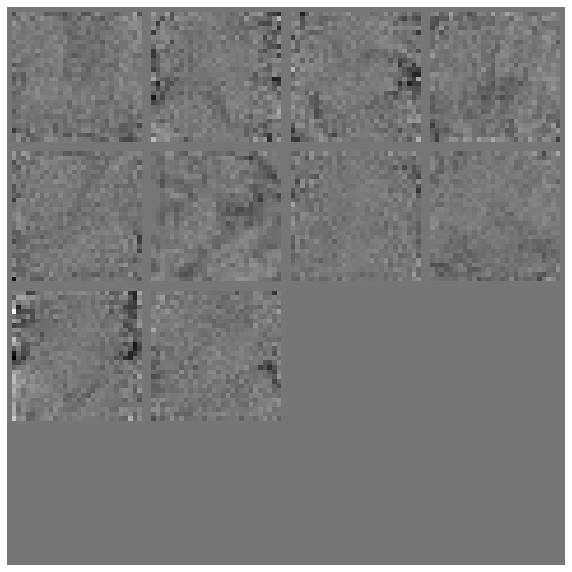

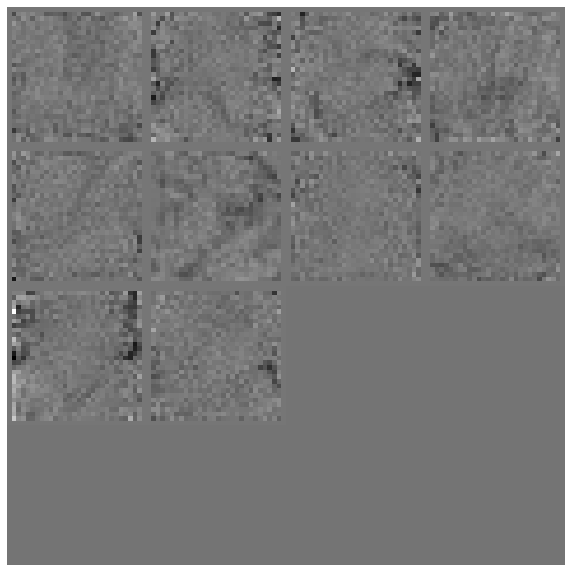

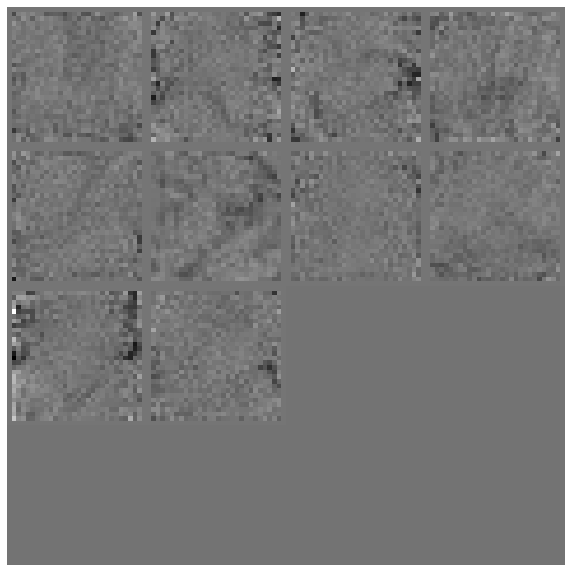

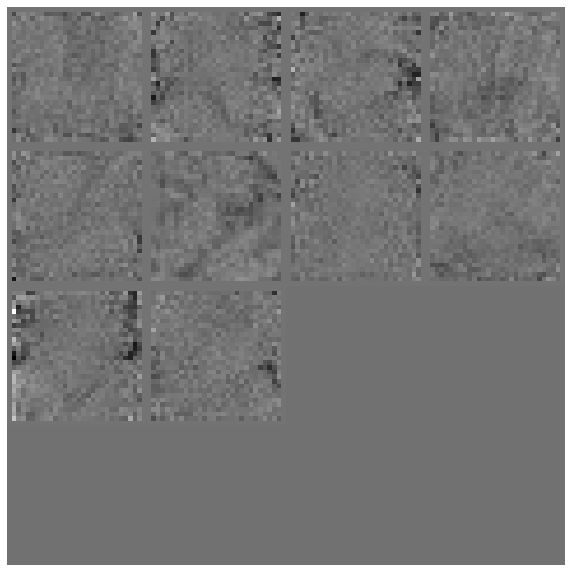

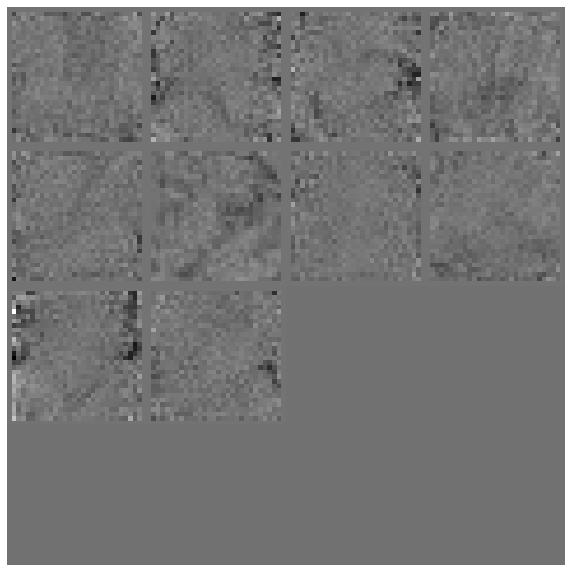

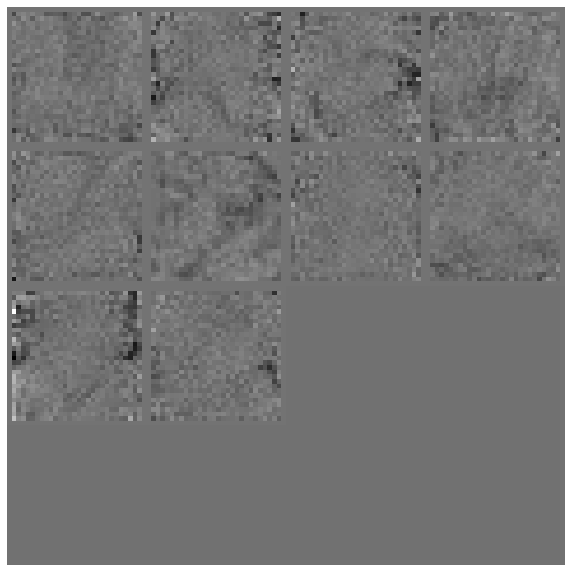

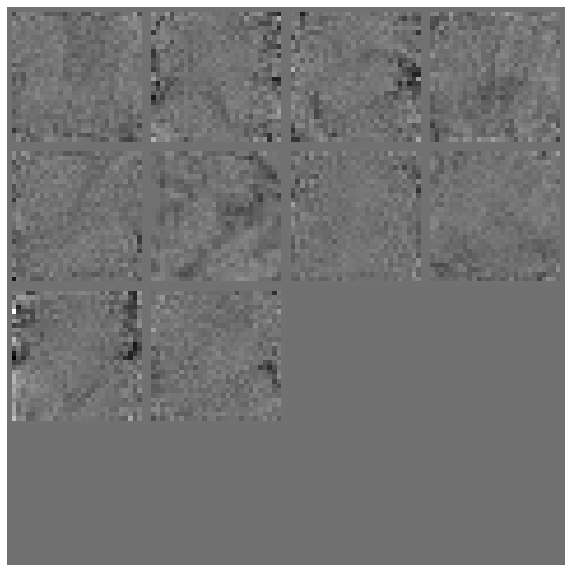

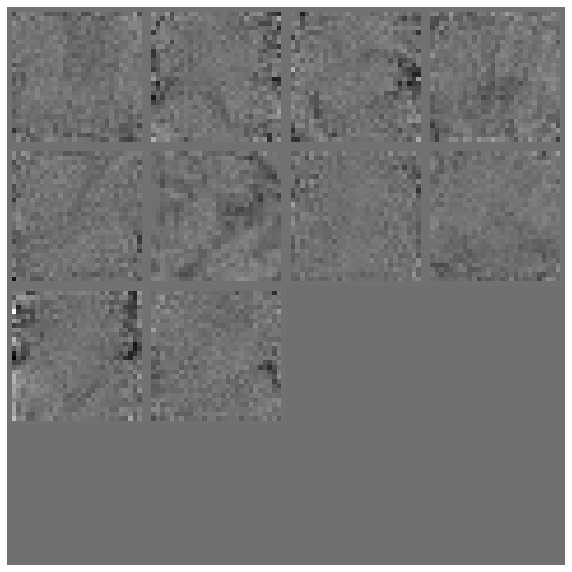

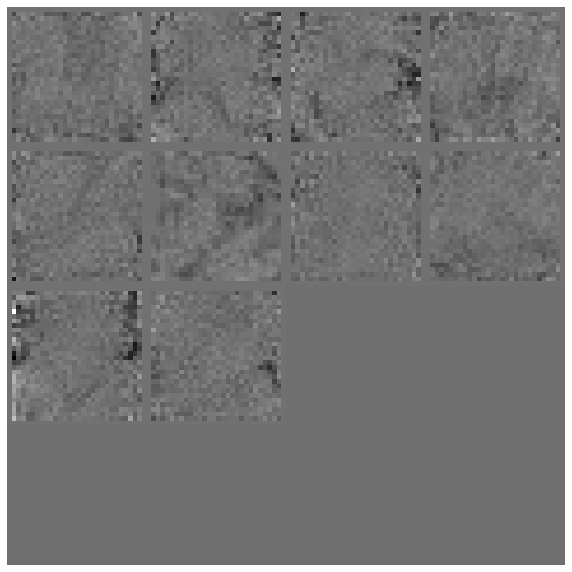

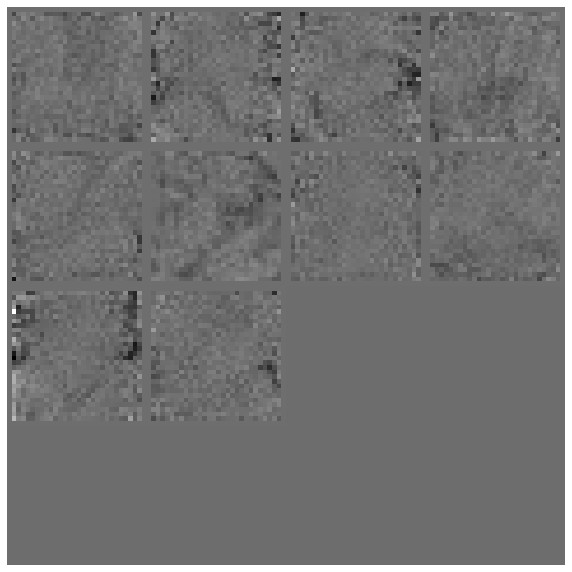

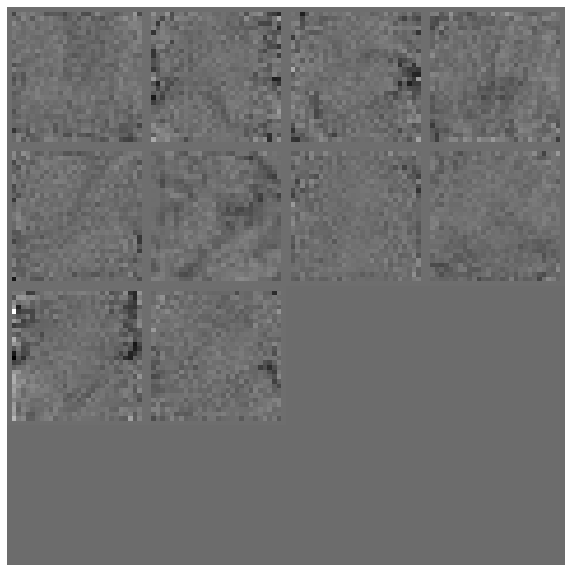

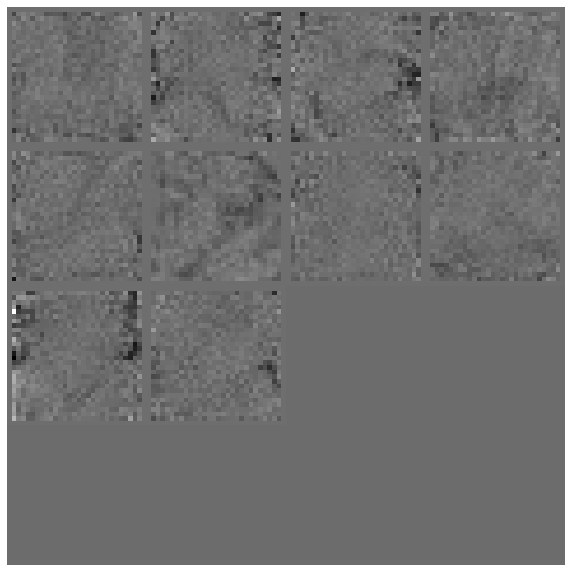

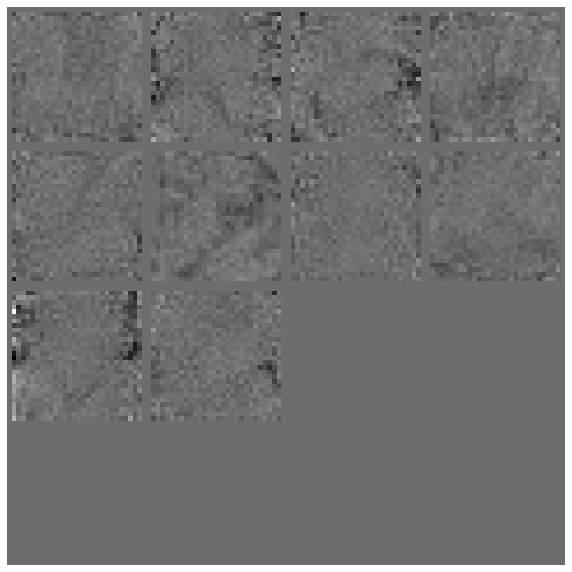

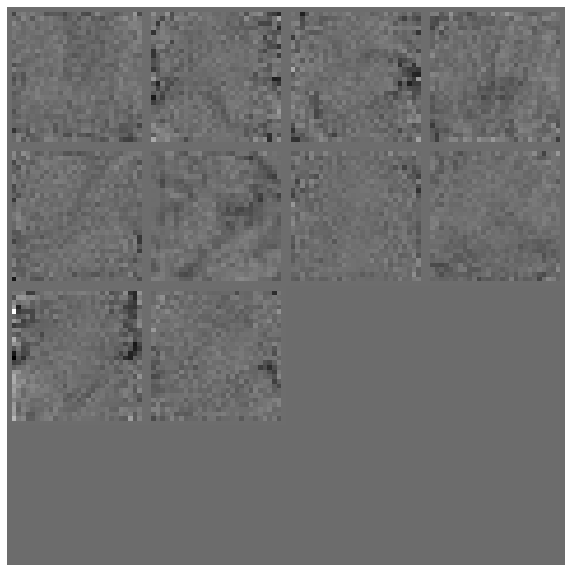

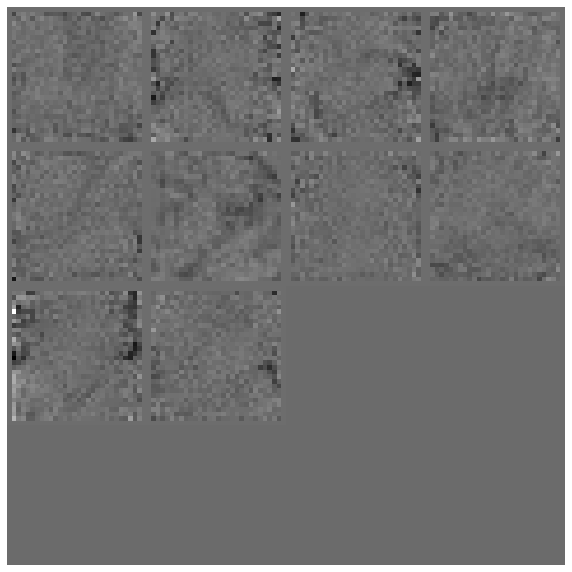

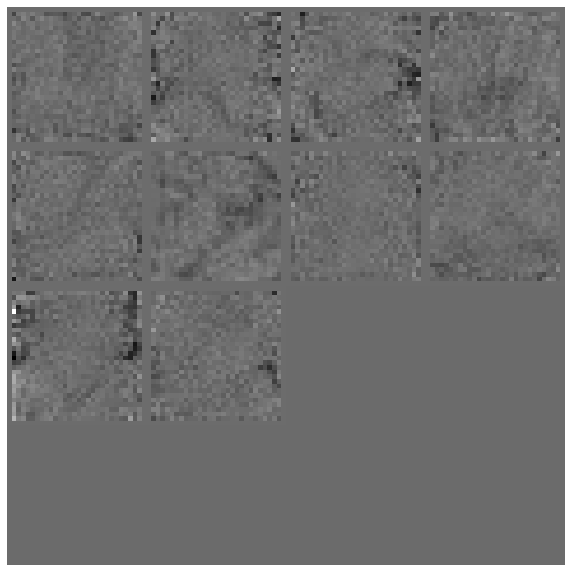

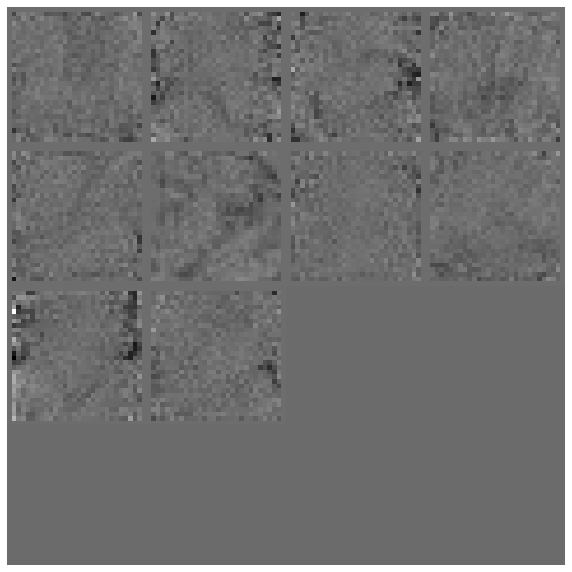

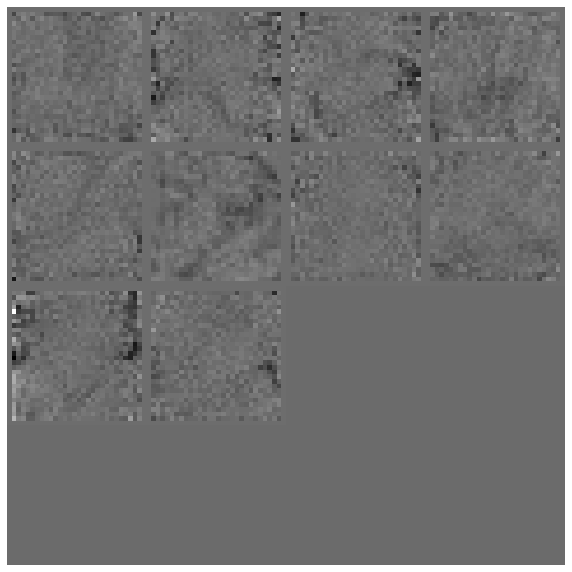

In [ ]:
wb.init(project="Simple_Linear_Adam_KMNIST");
c = wb.config

c.h = 0.01
c.b = 1024
c.epochs = 100000

w = [GPU(Truncated_Normal((784,10)))]

optimizer = torch.optim.Adam(w, lr=c.h)  

for i in range(c.epochs):

    x,y = get_batch('train')

    loss = cross_entropy(softmax(model(x,w)),y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
   
    wb.log({"loss": loss})

    make_plots()

    if i % 1000 == 0 : montage_plot((w[0].T).reshape(10,28,28).cpu().detach().numpy())

https://playground.tensorflow.org


https://tensorspace.org/

https://docs.google.com/presentation/d/1gY6kLb7YJtWzWqprVe3XfOjHALkPH6I1FvZ7MssWiTU/edit?usp=sharing